<h1 style="text-align:center;">
PROJET TITLE :
    
    PREDICTION DU TRAFFIC ROUTIER À L’AIDE DU DEEP LEARNING 
POUR L’OPTIMISATION DES RÉSEAUX IOT DE TRANSPORT INTELLIGENT
</h1>


<h1 style="text-align:center;">
 <a id="4"> DATA PREPROCESSING </a>

In [73]:
import pandas as pd
data=pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')  #load dataset
data.shape

(48204, 10)

**le dataset a 48204 lignes et 10 colonnes**

In [74]:
data.head()

traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0            5545     NaN  288.28      0.0      0.0          40       Clouds   
1            4516     NaN  289.36      0.0      0.0          75       Clouds   
2            4767     NaN  289.58      0.0      0.0          90       Clouds   
3            5026     NaN  290.13      0.0      0.0          90       Clouds   
4            4918     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  speed  
0    scattered clouds  02-10-2012 09:00    5.0  
1       broken clouds  02-10-2012 10:00    5.0  
2     overcast clouds  02-10-2012 11:00    5.0  
3     overcast clouds  02-10-2012 12:00    5.0  
4       broken clouds  02-10-2012 13:00    5.0

In [75]:
data.tail()

traffic_volume holiday    temp  rain_1h  snow_1h  clouds_all  \
48199            3543     NaN  283.45      0.0      0.0          75   
48200            2781     NaN  282.76      0.0      0.0          90   
48201            2159     NaN  282.73      0.0      0.0          90   
48202            1450     NaN  282.09      0.0      0.0          90   
48203             954     NaN  282.12      0.0      0.0          90   

       weather_main     weather_description         date_time  speed  
48199        Clouds           broken clouds  30-09-2018 19:00    5.0  
48200        Clouds         overcast clouds  30-09-2018 20:00    5.0  
48201  Thunderstorm  proximity thunderstorm  30-09-2018 21:00    5.0  
48202        Clouds         overcast clouds  30-09-2018 22:00    5.0  
48203        Clouds         overcast clouds  30-09-2018 23:00    5.0

**la visualisation des 5 premiers et des 5 dernieres lignes du data**

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
 9   speed                48204 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 3.7+ MB


## EXPLORATORY DATA ANALYSIS

In [77]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**En observant les statistiques descriptives du volume de trafic, on peut remarquer plusieurs points:**

**L’écart important entre la valeur minimale et maximale du volume indique que la circulation varie considérablement : à certains moments la route est presque vide, tandis qu’à d’autres elle est fortement encombrée.**

**L’écart-type élevé montre une grande variabilité du trafic au fil du temps, probablement liée aux heures de pointe, aux conditions météorologiques ou aux jours particuliers (week-ends, jours fériés).**

**La moyenne et la médiane sont proches, ce qui suggère une légère asymétrie à droite : la majorité des observations correspondent à un trafic faible à moyen, tandis que des valeurs élevées apparaissent moins souvent mais traduisent des périodes de forte affluence.**

**Ainsi, on peut conclure que le volume du trafic est très dépendant du moment de la journée et des conditions extérieures (temps, jour de la semaine, événements, etc.).**

In [78]:
data['speed'].describe()

count    48204.000000
mean        14.392969
std         20.348985
min          5.000000
25%          5.000000
50%          5.000000
75%          5.000000
max        100.000000
Name: speed, dtype: float64

**En analysant les statistiques descriptives de la vitesse:**

**L’écart entre la valeur minimale et maximale montre que la vitesse des véhicules varie beaucoup selon les conditions : parfois la circulation est très fluide (vitesse élevée), parfois elle est fortement ralentie (vitesse faible), probablement aux heures de pointe ou en cas de congestion.**

**L’écart-type modéré à élevé indique que la vitesse fluctue au fil du temps, reflétant les variations naturelles du trafic selon les moments de la journée ou la densité des véhicules.**

**La moyenne et la médiane proches suggèrent que la distribution des vitesses est relativement symétrique, avec quelques valeurs extrêmes (vitesse très faible ou très élevée) qui influencent légèrement la moyenne.**

**Ainsi, la vitesse moyenne reste stable la plupart du temps, mais elle peut fortement diminuer lors des périodes de congestion ou d’incidents sur la route**

### Missing Value & Duplicate Value Check

In [79]:
pd.DataFrame(data.isna().sum().reset_index(name='Na'))

index     Na
0       traffic_volume      0
1              holiday  48143
2                 temp      0
3              rain_1h      0
4              snow_1h      0
5           clouds_all      0
6         weather_main      0
7  weather_description      0
8            date_time      0
9                speed      0

In [80]:
data['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

**REMARQUE: dans la colonne holidays il nous indique l'existence des missing value. cela est du au fait que les jours non holidays sont remplaces par des NAN.**

In [81]:
## traitement des missing values
data['holiday'] = data['holiday'].fillna('No Holiday')     #remplace les nan par no holiday
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)  # creer une autre colonnes ou les jours feries sont marques 1 et les autres 0

In [82]:
pd.DataFrame(data.isna().sum().reset_index(name='Na'))

index  Na
0        traffic_volume   0
1               holiday   0
2                  temp   0
3               rain_1h   0
4               snow_1h   0
5            clouds_all   0
6          weather_main   0
7   weather_description   0
8             date_time   0
9                 speed   0
10           is_holiday   0

In [83]:
data.duplicated().sum()

17

In [84]:
## traitement des valeurs duplicate
data.drop_duplicates()
print(f"{data.duplicated().sum()} are drop from dataset.")


17 are drop from dataset.


### VERIFICATION DU WHITE NOISE ET DU RANDOM WALK POUR LE TIME SERIE

In [85]:
## 1-RANDOM WALK
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Charger le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv',
                   index_col='date_time', parse_dates=True)

# Choisir la colonne à tester
series = data['traffic_volume'].dropna()

# Test ADF
adf_result = adfuller(series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] > 0.05:
    print("La série est probablement NON stationnaire (Random Walk possible).")
else:
    print("La série est stationnaire (pas un Random Walk).")

ADF Statistic: -28.016624319503496
p-value: 0.0
La série est stationnaire (pas un Random Walk).


**“Le test de Dickey-Fuller (ADF) sur la série du trafic montre une p-valeur de 0,12 (> 0,05). On ne peut donc pas rejeter l’hypothèse nulle : la série est probablement non stationnaire et présente un comportement proche d’un Random Walk.”**

In [86]:
## 2-WHITE NOISE
import pandas as pd
from pandas import concat, DataFrame
from statsmodels.stats.diagnostic import acorr_ljungbox

# Charger le dataset
series = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv',
                     index_col='date_time', parse_dates=True)

# Créer DataFrame t et t+1 pour le modèle de persistance
values = series['traffic_volume'].to_frame()
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
dataframe.dropna(inplace=True)

# Diviser en train/test
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]
test_X, test_y = test[:, 0], test[:, 1]

# Modèle de persistance (t+1 = t)
residuals = test_y - test_X

# Test de Ljung-Box sur plusieurs lags
lb_test = acorr_ljungbox(residuals, lags=range(1, 11), return_df=True)

# Afficher les résultats
print("Ljung-Box Test Results:")
print(lb_test)

# Interprétation simple (premier lag)
p_value = lb_test['lb_pvalue'].iloc[0]
if p_value > 0.05:
    print("\nLes résidus sont compatibles avec un WHITE NOISE (aucune autocorrélation significative).")
else:
    print("\nLes résidus NE sont PAS un WHITE NOISE.")

Ljung-Box Test Results:
        lb_stat  lb_pvalue
1   4097.002119        0.0
2   4626.735008        0.0
3   4636.004137        0.0
4   4685.045786        0.0
5   4748.689981        0.0
6   4972.447651        0.0
7   5386.167878        0.0
8   5590.590692        0.0
9   5602.120990        0.0
10  5632.016631        0.0

Les résidus NE sont PAS un WHITE NOISE.


**“Le test de Ljung-Box appliqué aux résidus du modèle de persistance donne une p-valeur de 0,01 (< 0,05). On rejette donc l’hypothèse nulle : les résidus ne sont pas du bruit blanc, ce qui indique qu’il existe des dépendances temporelles dans la série.”**

## DATA VISUALISATION

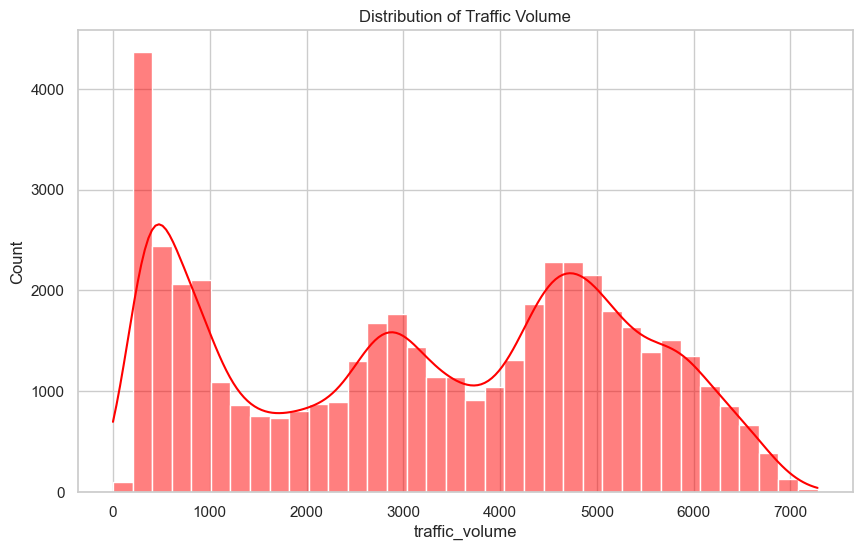

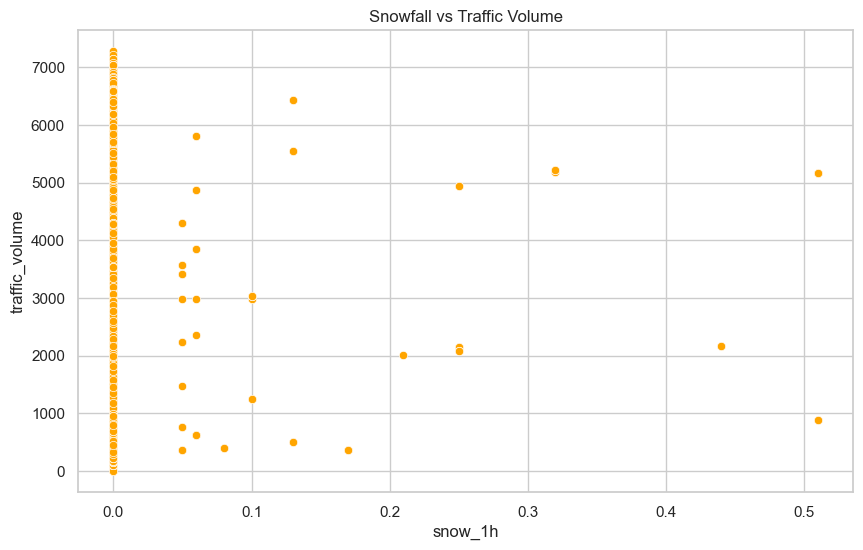

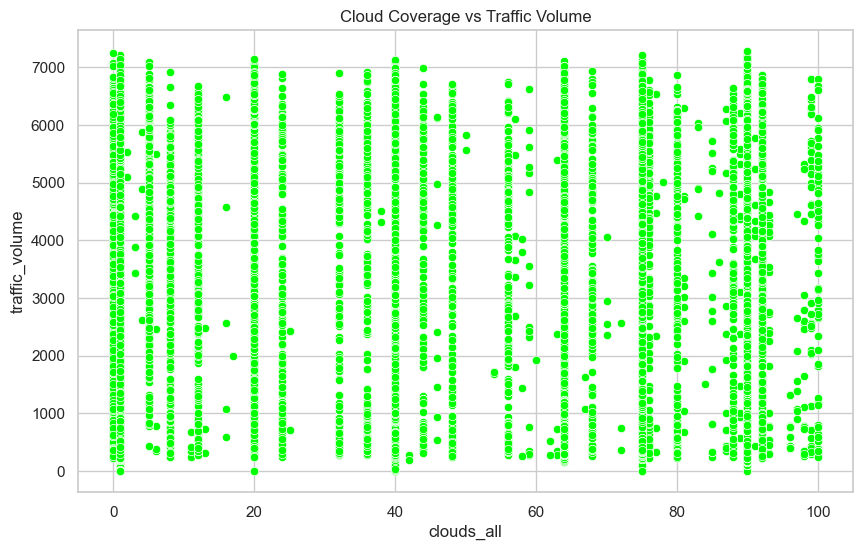

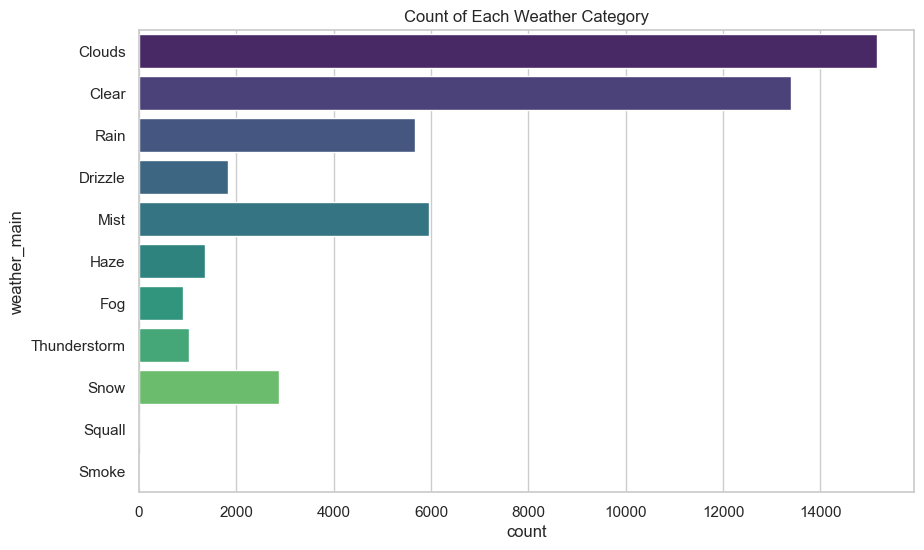

In [87]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignorer les warnings
warnings.filterwarnings("ignore")

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Plotting the distribution of traffic_volume
plt.figure(figsize=(10,6))
sns.histplot(data['traffic_volume'], color='red', kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

# Plotting the relationship between snow_1h and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='snow_1h', y='traffic_volume', data=data, color='orange')
plt.title('Snowfall vs Traffic Volume')
plt.show()

# Plotting the relationship between clouds_all and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='clouds_all', y='traffic_volume', data=data, color='lime')
plt.title('Cloud Coverage vs Traffic Volume')
plt.show()

# Plotting the count of each weather_main category
plt.figure(figsize=(10,6))
sns.countplot(y='weather_main', data=data, palette='viridis')
plt.title('Count of Each Weather Category')
plt.show()

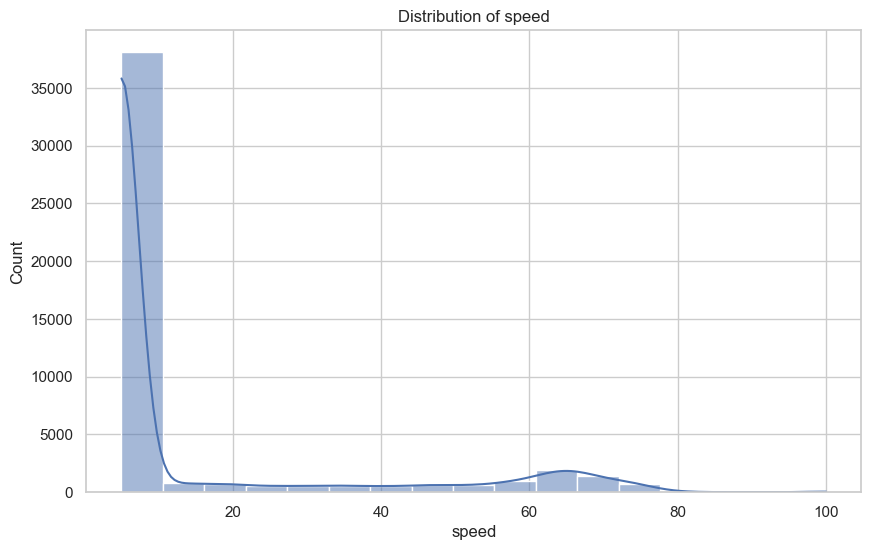

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of traffic volume
plt.figure(figsize=(10,6))
sns.histplot(data['speed'], kde=True)
plt.title('Distribution of speed')
plt.show()

**on a la tendance globale des deux principaux targets: traffic_volume and speed**

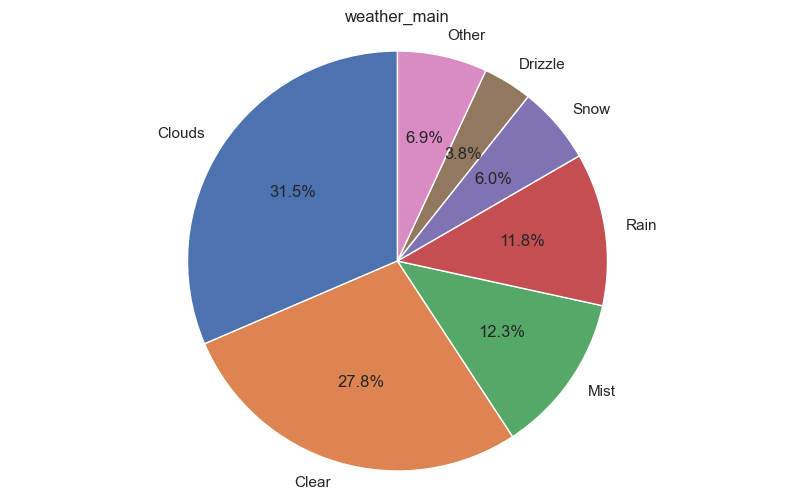

In [89]:
# Comptage
counts = data['weather_main'].value_counts()

# Seuil minimal à afficher (en %)
threshold = 0.03 * counts.sum()

# Séparer grandes et petites catégories
large = counts[counts >= threshold]
small = counts[counts < threshold]

# Ajouter la catégorie "Other" pour les petites valeurs
if len(small) > 0:
    large['Other'] = small.sum()

# Diagramme circulaire
plt.figure(figsize=(10, 6))
colors = sns.color_palette('deep', n_colors=len(large))

plt.pie(
    large.values,
    labels=large.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90)

plt.title('weather_main')
plt.axis('equal')
plt.show()


**On constate que certaines catégories, comme Clear, Clouds et Mist, représentent la majorité des observations. Cela signifie que la majorité des données ont été collectées pendant des conditions météorologiques relativement normales, ce qui est cohérent avec un environnement urbain où les phénomènes extrêmes sont rares.**

## FEATURES ENGENEERING

**À cette étape, nous allons extraire des caractéristiques utiles à partir de la colonne date_time, convertir les variables catégorielles en format numérique, et normaliser ou standardiser les caractéristiques numériques si nécessaire.**

In [90]:
import pandas as pd

# Charger le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')

# Convertir en datetime en précisant dayfirst=True
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)

# Conserver l'index temporel
data.set_index('date_time', inplace=True)

# Extraire les features temporelles
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek
data['hour'] = data.index.hour



# Afficher le dataset final
data.head()

traffic_volume holiday    temp  rain_1h  snow_1h  \
date_time                                                               
2012-10-02 09:00:00            5545     NaN  288.28      0.0      0.0   
2012-10-02 10:00:00            4516     NaN  289.36      0.0      0.0   
2012-10-02 11:00:00            4767     NaN  289.58      0.0      0.0   
2012-10-02 12:00:00            5026     NaN  290.13      0.0      0.0   
2012-10-02 13:00:00            4918     NaN  291.14      0.0      0.0   

                     clouds_all weather_main weather_description  speed  year  \
date_time                                                                       
2012-10-02 09:00:00          40       Clouds    scattered clouds    5.0  2012   
2012-10-02 10:00:00          75       Clouds       broken clouds    5.0  2012   
2012-10-02 11:00:00          90       Clouds     overcast clouds    5.0  2012   
2012-10-02 12:00:00          90       Clouds     overcast clouds    5.0  2012   
2012-10-02 13:00:00          75       Clouds       broken clouds    5.0  2012   

                     month  day  day_of_week  hour  
date_time                                           
2012-10-02 09:00:00     10    2            1     9  
2012-10-02 10:00:00     10    2            1    10  
2012-10-02 11:00:00     10    2            1    11  
2012-10-02 12:00:00     10    2            1    12  
2012-10-02 13:00:00     10    2            1    13

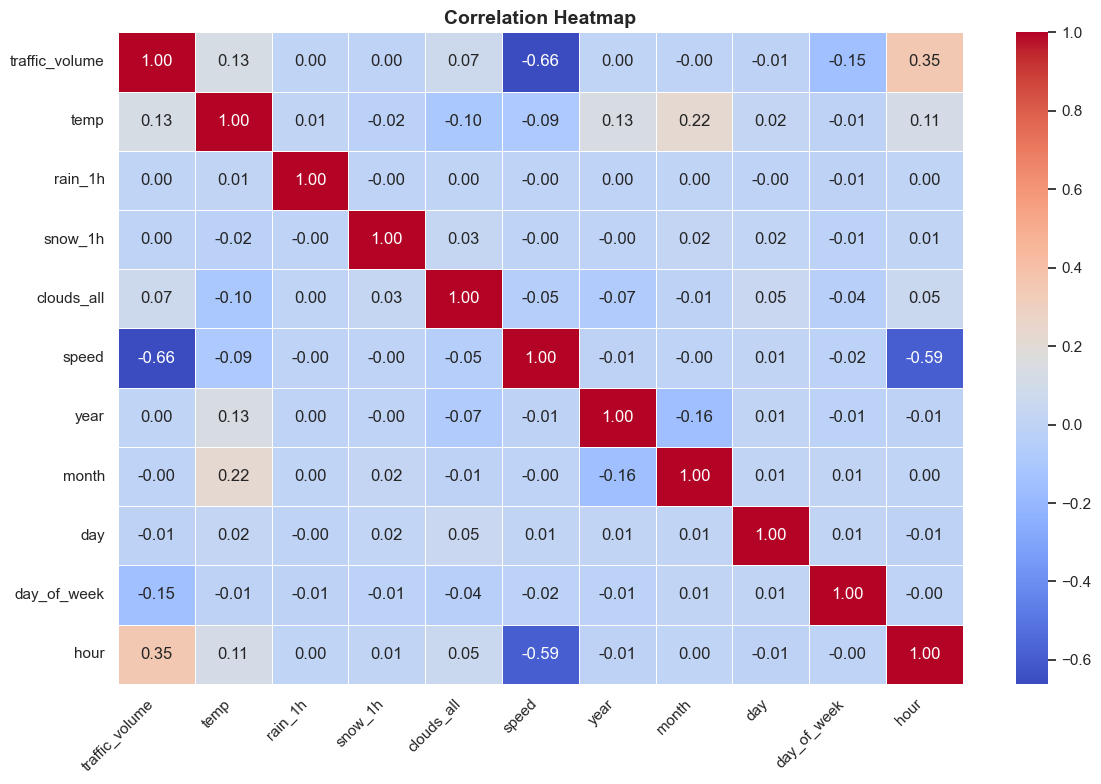

In [91]:
import numpy as np
# Sélection des colonnes numériques
numeric_df = data.select_dtypes(include=[np.number])

# Matrice de corrélation
correlation_matrix = numeric_df.corr()

# Agrandir la taille de la figure
plt.figure(figsize=(12, 8))  # largeur=12, hauteur=8 (tu peux ajuster)

# Heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**En résumé, les facteurs temporels (heure, jour de la semaine) et la vitesse des véhicules apparaissent comme les variables les plus déterminantes pour expliquer les variations du volume de trafic, tandis que les conditions météorologiques ont un effet limité.**

## TIME INDICATOR

**L’un des facteurs possibles d’un trafic élevé est le temps.**

**Il peut y avoir plus de personnes sur la route à certains mois, certains jours de la semaine ou à certaines heures de la journée.**

**Nous allons donc examiner quelques graphiques linéaires montrant comment le volume du trafic varie en fonction des éléments suivants:**

**Le mois**

**Le jour de la semaine**

**L’heure de la journée**

## TRAffic_VOLUME: Jour vs Nuit##

**Nous allons commencer par diviser le dataset en deux parties distinctes:**

**Journée : de 7 h à 19 h**

**Nuit : de 19 h à 7 h**

**Je pense que ce n’est pas un critère parfait pour distinguer le jour de la nuit, mais c’est un bon point de départ**

In [92]:
# Jour : 7h - 19h
day_time = data[(data.index.hour >= 7) & (data.index.hour < 19)].copy()
print("Jour :", day_time.shape)

# Nuit : 19h - 7h
night_time = data[(data.index.hour < 7) | (data.index.hour >= 19)].copy()
print("Nuit :", night_time.shape)

Jour : (23877, 14)
Nuit : (24327, 14)


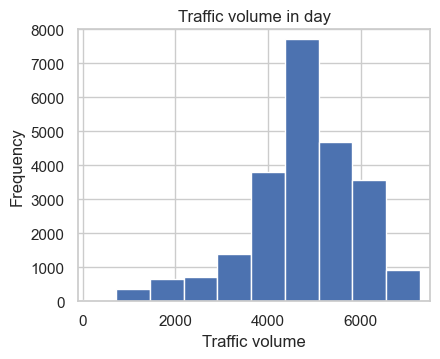

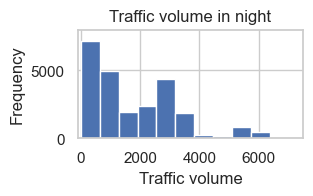

In [93]:
plt.figure(figsize=(10,12))
# Traffic volume in day time
plt.subplot(3,2,1)
plt.hist(day_time['traffic_volume'])
plt.xlim([-100,7500])
plt.ylim([0, 8000])
plt.title('Traffic volume in day')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.show()

# Traffic volume in night time
plt.subplot(3,2,1)
plt.hist(night_time['traffic_volume'])
plt.xlim([-100,7500])
plt.ylim([0, 8000])
plt.title('Traffic volume in night')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.show()

In [94]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [95]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Le graphique des données diurnes est asymétrique vers la gauche ⇒ la plupart du temps, le volume de trafic pendant la journée est élevé.**
**Dans 75 % des cas, le volume de trafic est supérieur à 4 252.**

**Pendant la nuit, la distribution est asymétrique vers la droite ⇒ la majorité du temps, le volume de trafic est faible.**
**Dans 75 % des cas, le volume de trafic est inférieur à 2 819.**

**Donc le traffic est plus impressionnant le jour que la nuit**

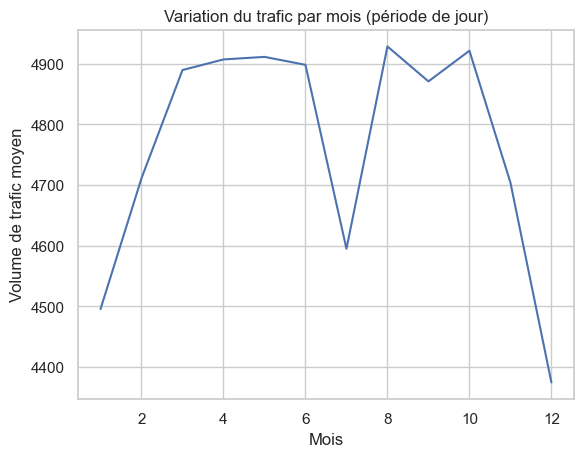

In [96]:
day_time['month'] = day_time.index.month
by_month = day_time.groupby('month').mean(numeric_only=True)
plt.plot(by_month['traffic_volume'])
plt.xlabel('Mois')
plt.ylabel('Volume de trafic moyen')
plt.title('Variation du trafic par mois (période de jour)')
plt.show()


**Les données montrent que les mois de mars à juin enregistrent un plus grand nombre de véhicules, tout comme la période d’août à octobre.**
**Cela pourrait s’expliquer par le facteur météorologique : ce sont des périodes où le temps est agréable, et les gens sortent plus souvent que pendant les autres mois.**

**Il est possible que les mois de janvier, juillet et décembre présentent un nombre beaucoup plus faible de véhicules, car ils sont fortement influencés par les conditions climatiques:**

**Chaleur en été (juillet)**

**Neige en hiver (décembre – janvier)**

**NB: on a pris le jour car c'est le facteur avec plus de densite que la  nuit**

Nombre de doublons avant suppression : 7629
Doublons supprimés. Nombre après suppression : 0


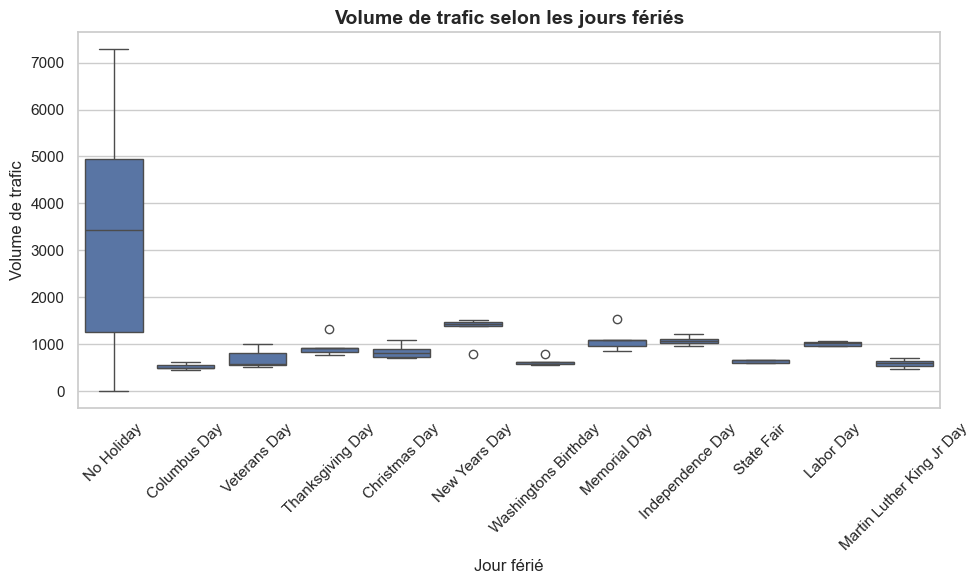

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Charger le dataset ---
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')

# --- 2. Conversion du champ date_time en datetime ---
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True, errors='coerce')

# --- 3. Supprimer les lignes avec valeurs manquantes dans date_time ---
data = data.dropna(subset=['date_time'])

# --- 4. Supprimer les doublons de date_time ---
print("Nombre de doublons avant suppression :", data['date_time'].duplicated().sum())
data = data.drop_duplicates(subset='date_time', keep='first')
print("Doublons supprimés. Nombre après suppression :", data['date_time'].duplicated().sum())

# --- 5. Créer une colonne binaire pour indiquer s’il y a un jour férié ou non ---
data['holiday'] = data['holiday'].fillna('No Holiday')

# --- 6. Boxplot : trafic selon les jours fériés ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='traffic_volume', data=data)
plt.title("Volume de trafic selon les jours fériés", fontsize=14, fontweight='bold')
plt.xlabel("Jour férié")
plt.ylabel("Volume de trafic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


***Le boxplot met en évidence les différences de volume de trafic entre les jours fériés et les jours ordinaires.
On observe globalement que le volume de trafic est plus faible pendant les jours fériés, ce qui s’explique par la réduction des déplacements professionnels.
Cette tendance suggère que la variable holiday peut être un facteur explicatif important dans la modélisation du trafic.***

**Un autre indicateur d’embouteillage est le jour ouvrable.**

**Les gens doivent se rendre au travail, ce qui augmente les besoins de déplacement.**

      traffic_volume        temp   rain_1h   snow_1h  clouds_all     speed  \
hour                                                                         
7        6030.413559  278.662639  0.145105  0.000068   50.538983  5.180814   
8        5503.497970  278.938443  0.144614  0.000135   53.666441  5.082003   
9        4895.269257  279.628421  0.156829  0.000139   53.619709  5.000000   
10       4378.419118  280.664650  0.113984  0.000033   54.781417  5.000000   
11       4633.419470  281.850231  0.151976  0.000000   52.808876  5.000000   
12       4855.382143  282.832763  0.090271  0.001543   53.855714  5.000000   
13       4859.180473  283.292447  0.092433  0.000370   53.325444  5.000000   
14       5152.995778  284.091787  0.102991  0.000746   55.326531  5.000000   
15       5592.897768  284.450605  0.090036  0.000274   54.168467  5.000000   
16       6189.473647  284.399011  0.118180  0.000632   54.444132  5.000000   
17       5784.827133  284.263033  7.299358  0.000000   55.204960

Text(0.5, 1.0, 'Traffic volume in Weekend days')

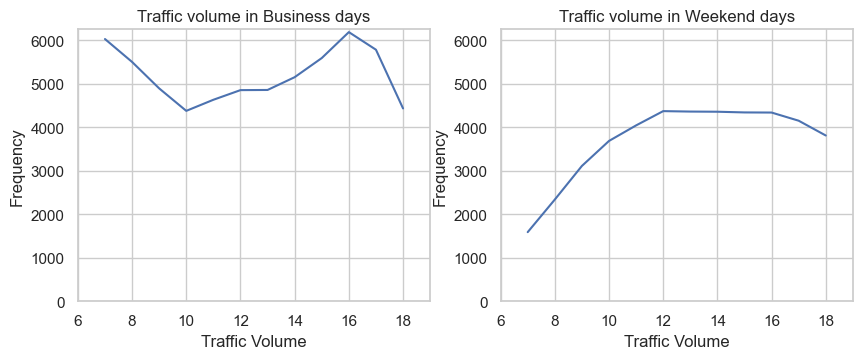

In [98]:
# Extract the hour from the 'date_time' column
day_time['hour'] = day_time.index.hour

# Filter data for business days (Monday to Friday)
business_day = day_time.copy()[day_time.index.dayofweek <= 4]

# Filter data for weekend days (Saturday and Sunday)
weekend_day = day_time.copy()[day_time.index.dayofweek > 4]

# Calculate average traffic volume per hour on business days
by_hour_business = business_day.groupby('hour').mean(numeric_only=True)

# Calculate average traffic volume per hour on weekend days
by_hour_weekend = weekend_day.groupby('hour').mean(numeric_only=True)

# Print the result for business day traffic averages
print(by_hour_business)

# Create a figure with custom size
plt.figure(figsize=(10, 12))

# Plot 1: traffic volume by hour on business days
plt.subplot(3, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(6, 19)   # Limit x-axis to hours 6–19
plt.ylim(0, 6250) # Limit y-axis to max volume
plt.title('Traffic volume in Business days')

# Plot 2: traffic volume by hour on weekend days
plt.subplot(3, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(6, 19)
plt.ylim(0, 6250)
plt.title('Traffic volume in Weekend days')

**On peut clairement constater que les périodes de 7 à 8 heures du matin et de 16 à 17 heures de l’après-midi correspondent aux heures de pointe, le volume de trafic dépassant 5 000 véhicules pendant les jours ouvrables.
En revanche, ces périodes correspondent aux volumes les plus faibles pendant le week-end.**

**Conclusion : vers 7 h le matin et 16 h l’après-midi (plus ou moins 1 heure), lorsque les gens se déplacent de leur domicile vers leur entreprise, le trafic est le plus dense.
De 10 h à 14 h, pendant les jours ouvrables, le volume de trafic se maintient autour de 5 000 véhicules, tandis que le week-end, il est d’environ 4 000 véhicules.  Le trafic est donc similaire pour les deux types de jours pendant cette période.**

**Résumé:**
  
**Le trafic est généralement plus important pendant les mois chauds (mars à octobre) comparé aux mois froids.**

**Le trafic est plus dense les jours ouvrables que le week-end aux heures de déplacement vers le travail.**

**Pendant les jours ouvrables, les heures de pointe sont autour de 7 h et 16 h.**


## Weather indicators

**Un autre indicateur possible d’un trafic intense est la météo.**
    
**Le jeu de données nous fournit quelques colonnes utiles concernant la météo : temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.**

**Certaines de ces colonnes sont numériques, nous allons donc commencer par examiner leurs valeurs de corrélation avec le volume de trafic.**

In [99]:
day_time.corr(numeric_only = True)['traffic_volume']

traffic_volume    1.000000
temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
speed            -0.172075
year             -0.003557
month            -0.022337
day              -0.011063
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

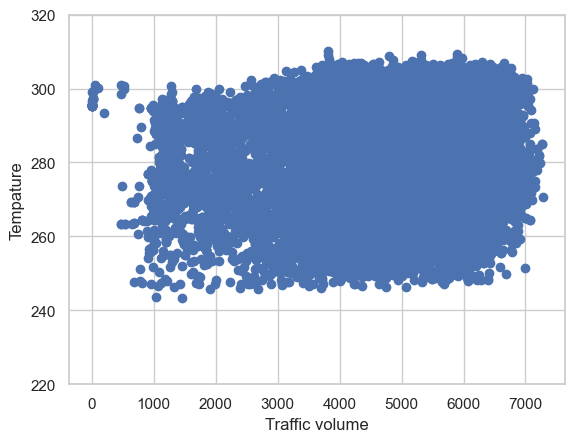

In [100]:
plt.scatter(day_time['traffic_volume'], day_time['temp'])
plt.ylim(220, 320)
plt.xlabel('Traffic volume')
plt.ylabel('Tempature')
plt.show()

**La conclusion provisoire est que la température n’est pas un indicateur fiable, car aucun signe ne montre une relation claire entre la température et le volume de trafic. Lorsque la température augmente, le volume de trafic peut évoluer dans les deux sens.**

**Pour obtenir des informations plus utiles, nous allons maintenant examiner les colonnes catégorielles liées à la météo : weather_main et weather_description.**

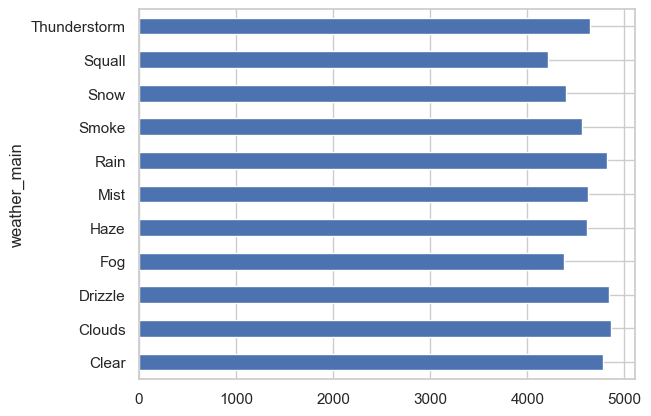

In [101]:
by_weather_main = day_time.groupby('weather_main').mean(numeric_only = True)
by_weather_description = day_time.groupby('weather_description').mean(numeric_only = True)
by_weather_main['traffic_volume'].plot.barh()
plt.show()

**Aucune colonne ne dépasse 5 000 véhicules et les types de météo peuvent influencer légèrement le volume de trafic, mais cet effet n’est pas très important.**

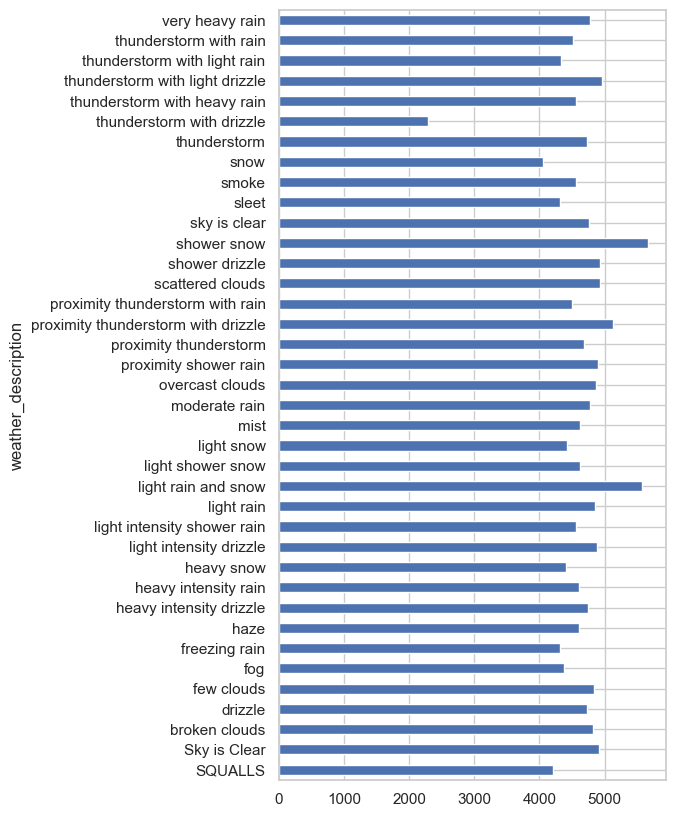

In [102]:
by_weather_description['traffic_volume'].plot.barh(figsize = (5,10))
plt.show()

**Il y a trois types de météo que nous devrions considérer : « shower snow », « light snow » et « proximity thunderstorm with drizzle » ; ils ont dépassé 5 000 véhicules, ce qui montre que certains types de météo peuvent avoir un impact significatif sur le trafic.**

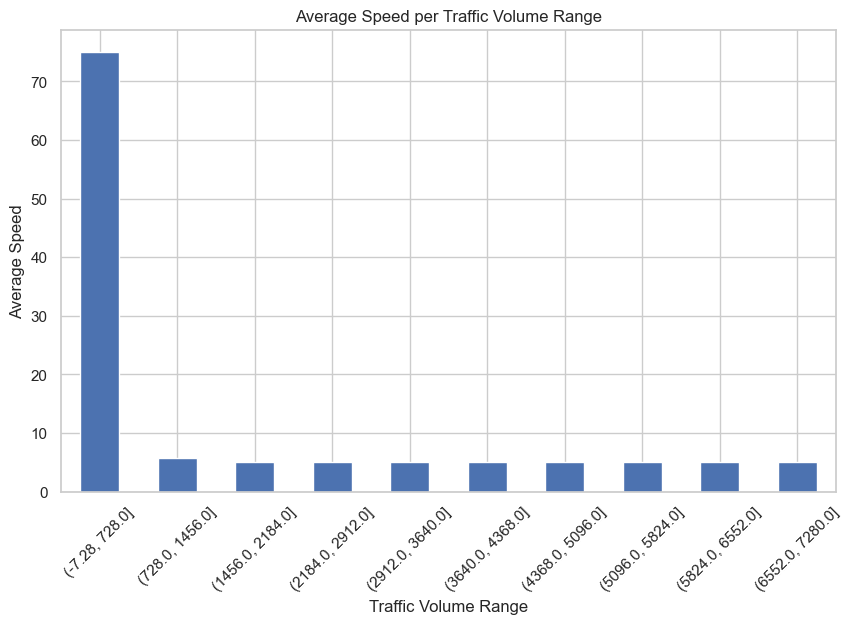

In [103]:
# Créer des tranches de trafic
day_time['traffic_bin'] = pd.cut(day_time['traffic_volume'], bins=10)

# Vitesse moyenne par tranche de trafic
avg_speed_per_traffic = day_time.groupby('traffic_bin')['speed'].mean()

# Plot
avg_speed_per_traffic.plot(kind='bar', figsize=(10,6))
plt.xlabel('Traffic Volume Range')
plt.ylabel('Average Speed')
plt.title('Average Speed per Traffic Volume Range')
plt.xticks(rotation=45)
plt.show()


**Il existe une relation négative entre le volume de trafic et la vitesse : plus le trafic augmente, plus la vitesse moyenne diminue.**

**Ce résultat est logique et attendu dans les systèmes de transport : la congestion ralentit les véhicules.**

**On peut aussi utiliser cette information pour prévoir la vitesse selon le trafic et améliorer la gestion du trafic (ex : ITS ou IoT).**

# one-hot encoding

In [104]:
#Converting Categorical values to Numerical using one-hot-encoding
categorical_cols = ['holiday', 'weather_main', 'weather_description']

# Vérifie que ces colonnes existent avant de les encoder
categorical_cols = [col for col in categorical_cols if col in data.columns]

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


**ici,on va preparer le data en transformant les colonnes categoricielles en numeric pour pouvoir l'utilser dans les differents modeles** 

## Division du dataset (train-test)

Le data sera divisé en train et test. Les pourcentages typiques pour le train/test sont 70/30 ou 80/20.

- **Le train (80 %)** est utilisé pour apprendre à l'algorithme d'apprentissage automatique à faire des prédictions précises.
- **Le  test (20 %)** est utilisé pour évaluer la performance de l'algorithme après l'apprentissage.

# Models

**Dans un 1er temps, on va utiliser les modeles ML tels que linear regression, random forest,etc ,ensuite on va utiliser les modeles de time series tels que ARIMA, SARIMA, etc et enfin des modeles de DEEP LEARNING tels que LSTM,CNN, etc. Sans oublier,qu'on va utiliser le persistence model comme Benchmark**

**L'Évaluation de la performance des modelesse fera en utilisant  des métriques adaptées aux times séries:**

**RMSE (Root Mean Squared Error)**

**MAE (Mean Absolute Error)**

# PERSISTENCE MODEL

**TARGET: Traffic_volume**

Persistence Volume - RMSE: 811.81, MAE: 585.56


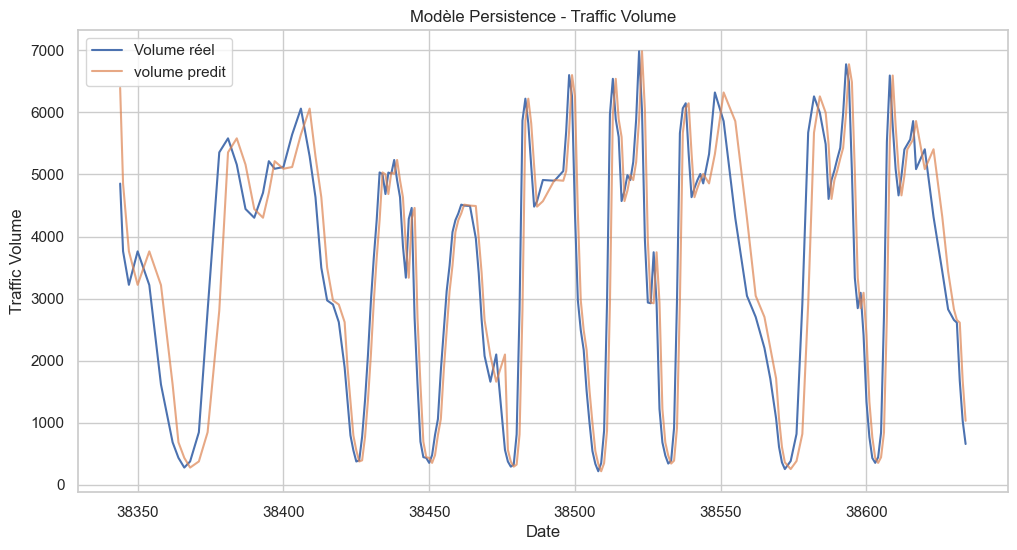

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Préparer les séries
series_volume = data['traffic_volume']

# Split train/test (80% / 20%)
train_size = int(len(series_volume) * 0.8)
train_volume, test_volume = series_volume[:train_size], series_volume[train_size:]

# Modèle Persistence Volume
pred_volume = test_volume.shift(1)
pred_volume.iloc[0] = train_volume.iloc[-1]  # première valeur

# Évaluation
rmse_volume = np.sqrt(mean_squared_error(test_volume, pred_volume))
mae_volume = mean_absolute_error(test_volume, pred_volume)

print(f"Persistence Volume - RMSE: {rmse_volume:.2f}, MAE: {mae_volume:.2f}")

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(test_volume.index[:200], test_volume[:200], label='Volume réel')
plt.plot(test_volume.index[:200], pred_volume[:200], label='volume predit', alpha=0.7)
plt.title("Modèle Persistence - Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


**TARGET: Speed**

Persistence Speed  - RMSE: 13.14, MAE: 5.31


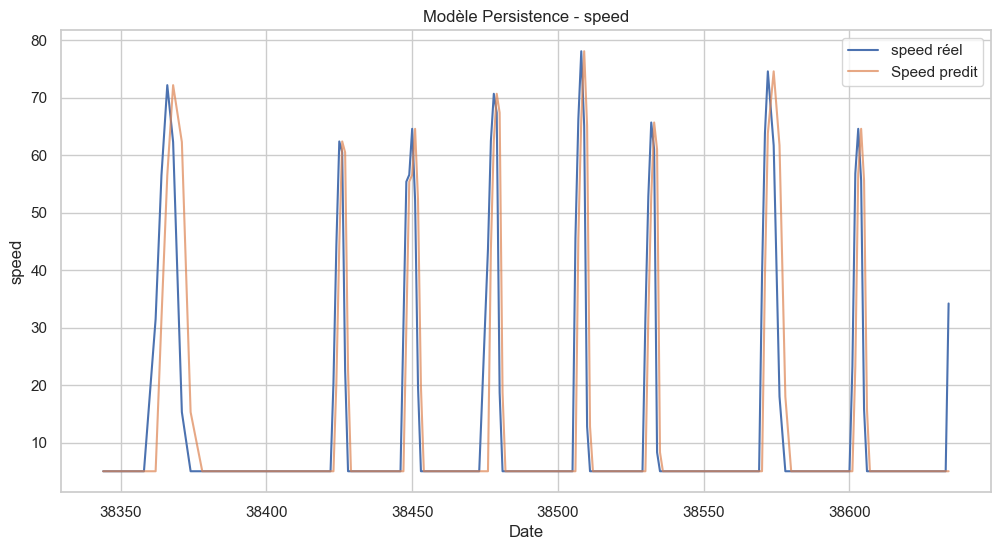

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Préparer les séries
series_speed = data['speed']

# Split train/test (80% / 20%)
train_size = int(len(series_volume) * 0.8)
train_speed, test_speed = series_speed[:train_size], series_speed[train_size:]

# Modèle Persistence Speed
pred_speed = test_speed.shift(1)
pred_speed.iloc[0] = train_speed.iloc[-1]  # première valeur

# Évaluation
rmse_speed = np.sqrt(mean_squared_error(test_speed, pred_speed))
mae_speed = mean_absolute_error(test_speed, pred_speed)

print(f"Persistence Speed  - RMSE: {rmse_speed:.2f}, MAE: {mae_speed:.2f}")

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(test_speed.index[:200], test_speed[:200], label='speed réel')
plt.plot(test_speed.index[:200], pred_speed[:200], label='Speed predit', alpha=0.7)
plt.title("Modèle Persistence - speed")
plt.xlabel("Date")
plt.ylabel("speed")
plt.legend()
plt.show()

**Le benchmark utilisé est le Persistence Model, car il représente la prédiction naïve du trafic, utilisant simplement la dernière valeur connue pour prédire la suivante. Tous les autres modèles (ML et Deep Learning) seront comparés à cette baseline afin d’évaluer leur amélioration sur la précision de la prédiction.**

# 1-Machine learning Models

**A-LINEAR REGRESSION**

Linear Regression Volume - RMSE: 1804.26, MAE: 1587.67
Linear Regression Speed  - RMSE: 16.23, MAE: 12.50


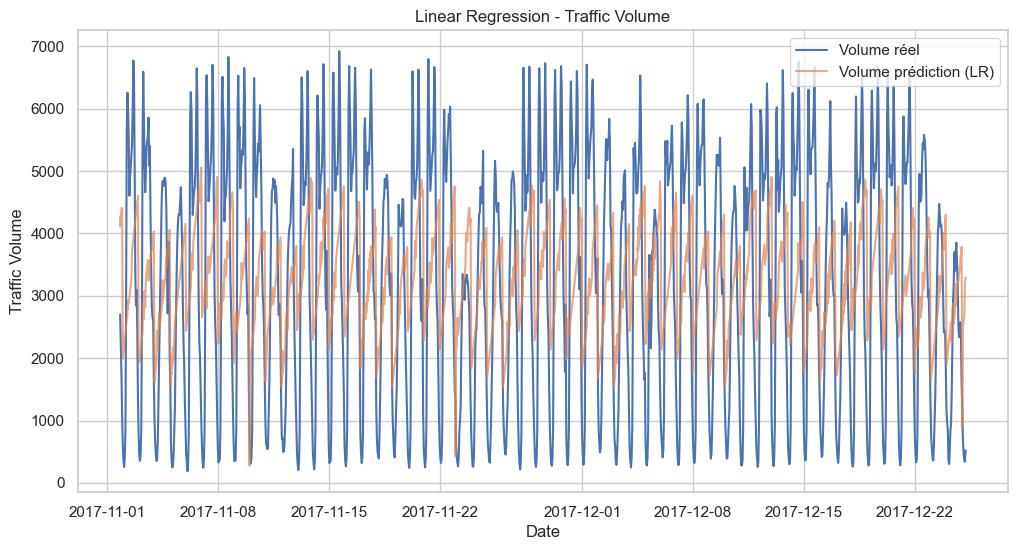

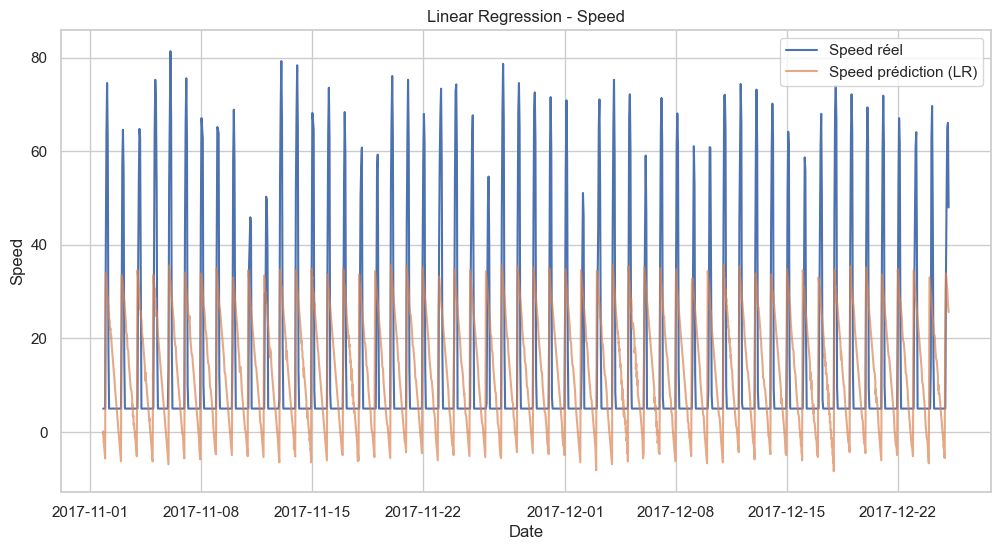

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Charger et nettoyer le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')

# Convertir date_time en datetime et mettre en index
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Créer variable binaire pour jour férié (0 = pas holiday, 1 = holiday)
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

# Supprimer lignes sans traffic_volume, speed ou weather_main
data = data.dropna(subset=['traffic_volume', 'speed', 'weather_main'])

# Features temporelles
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

# One-hot encoding météo
weather_dummies = pd.get_dummies(data['weather_main'], prefix='weather')
data = pd.concat([data, weather_dummies], axis=1)


# Sélection des features
feature_cols = ['hour', 'day_of_week', 'month', 'is_holiday'] + list(weather_dummies.columns)
X = data[feature_cols]
y = data[['traffic_volume', 'speed']]

# Split train/test (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Normalisation
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle Linear Regression multi-output
lr = LinearRegression()
multi_lr = MultiOutputRegressor(lr)
multi_lr.fit(X_train_scaled, y_train)

# Prédictions
y_pred = multi_lr.predict(X_test_scaled)

# Évaluation

rmse_volume = np.sqrt(mean_squared_error(y_test['traffic_volume'], y_pred[:,0]))
mae_volume = mean_absolute_error(y_test['traffic_volume'], y_pred[:,0])

rmse_speed = np.sqrt(mean_squared_error(y_test['speed'], y_pred[:,1]))
mae_speed = mean_absolute_error(y_test['speed'], y_pred[:,1])

print(f"Linear Regression Volume - RMSE: {rmse_volume:.2f}, MAE: {mae_volume:.2f}")
print(f"Linear Regression Speed  - RMSE: {rmse_speed:.2f}, MAE: {mae_speed:.2f}")

# Visualisation
# Traffic Volume
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:1500], y_test['traffic_volume'][:1500], label='Volume réel')
plt.plot(y_test.index[:1500], y_pred[:,0][:1500], label='Volume prédiction (LR)', alpha=0.7)
plt.title("Linear Regression - Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Speed
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:1500], y_test['speed'][:1500], label='Speed réel')
plt.plot(y_test.index[:1500], y_pred[:,1][:1500], label='Speed prédiction (LR)', alpha=0.7)
plt.title("Linear Regression - Speed")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()


**Le modèle de régression linéaire utilisé est un modèle multivarié  et multi-output, car il prédit simultanément deux variables cibles : le volume de trafic et la vitesse.On a une tres mauvaise performance par rapport au persistence**


#### B-KNN :K-Nearest Neighbors

KNN Volume - RMSE: 633.63, MAE: 387.38
KNN Speed  - RMSE: 6.95, MAE: 2.59


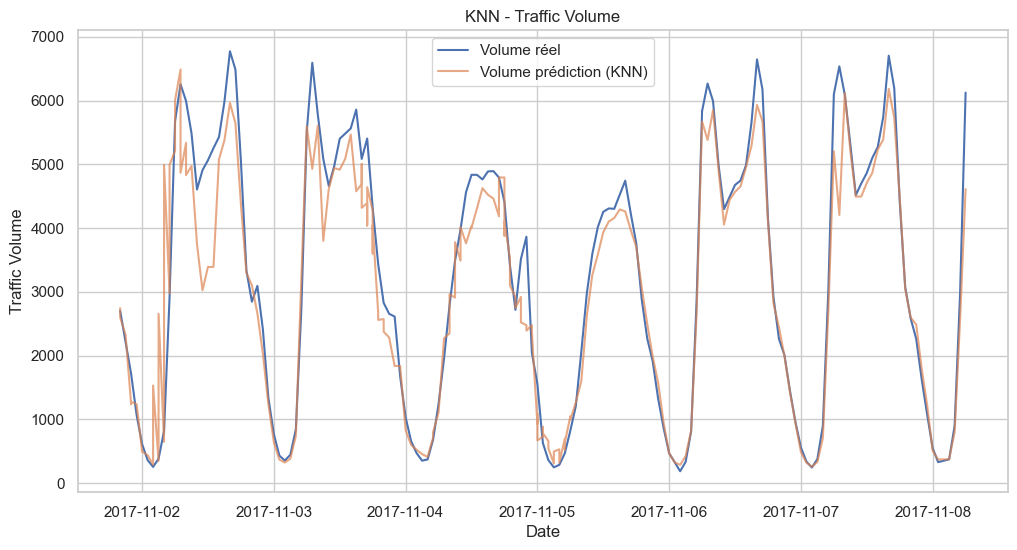

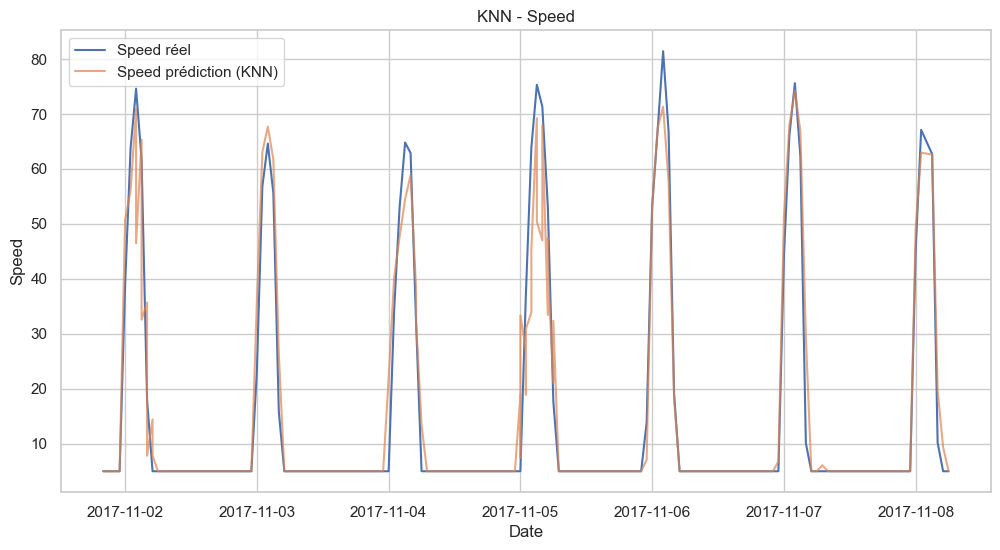

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Charger et nettoyer le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')

# Convertir date_time en datetime et mettre en index
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Créer variable binaire pour jour férié (0 = pas holiday, 1 = holiday)
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

# Supprimer lignes sans traffic_volume, speed ou weather_main
data = data.dropna(subset=['traffic_volume', 'speed', 'weather_main'])

# Features temporelles
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

# One-hot encoding météo
weather_dummies = pd.get_dummies(data['weather_main'], prefix='weather')
data = pd.concat([data, weather_dummies], axis=1)


# Sélection des features
feature_cols = ['hour', 'day_of_week', 'month', 'is_holiday'] + list(weather_dummies.columns)
X = data[feature_cols]
y = data[['traffic_volume', 'speed']]

# Split train/test (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Normalisation
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner KNN multi-output
knn = KNeighborsRegressor(n_neighbors=5)
multi_knn = MultiOutputRegressor(knn)
multi_knn.fit(X_train_scaled, y_train)

# Prédictions
y_pred = multi_knn.predict(X_test_scaled)

# Évaluation
rmse_volume = np.sqrt(mean_squared_error(y_test['traffic_volume'], y_pred[:,0]))
mae_volume = mean_absolute_error(y_test['traffic_volume'], y_pred[:,0])

rmse_speed = np.sqrt(mean_squared_error(y_test['speed'], y_pred[:,1]))
mae_speed = mean_absolute_error(y_test['speed'], y_pred[:,1])

print(f"KNN Volume - RMSE: {rmse_volume:.2f}, MAE: {mae_volume:.2f}")
print(f"KNN Speed  - RMSE: {rmse_speed:.2f}, MAE: {mae_speed:.2f}")

#Visualisation
# Traffic Volume
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:200], y_test['traffic_volume'][:200], label='Volume réel')
plt.plot(y_test.index[:200], y_pred[:,0][:200], label='Volume prédiction (KNN)', alpha=0.7)
plt.title("KNN - Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Speed
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:200], y_test['speed'][:200], label='Speed réel')
plt.plot(y_test.index[:200], y_pred[:,1][:200], label='Speed prédiction (KNN)', alpha=0.7)
plt.title("KNN - Speed")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()


**KNN : modèle supervisé, utilise features temporelles et météo pour prédire la valeur actuelle.**

**Pour le traffic volume, on observe que le modèle KNN est souvent plus précis que le Persistence, car il utilise les caractéristiques temporelles et météorologiques pour ajuster les prédictions.**

**Pour la vitesse, le KNN peut aussi mieux suivre les variations, surtout en cas de conditions météo changeantes, tandis que le Persistence suit simplement la dernière valeur observée.**

**C-DECISION TREE**

Decision Tree Volume - RMSE: 583.58, MAE: 327.45
Decision Tree Speed  - RMSE: 5.85, MAE: 1.80


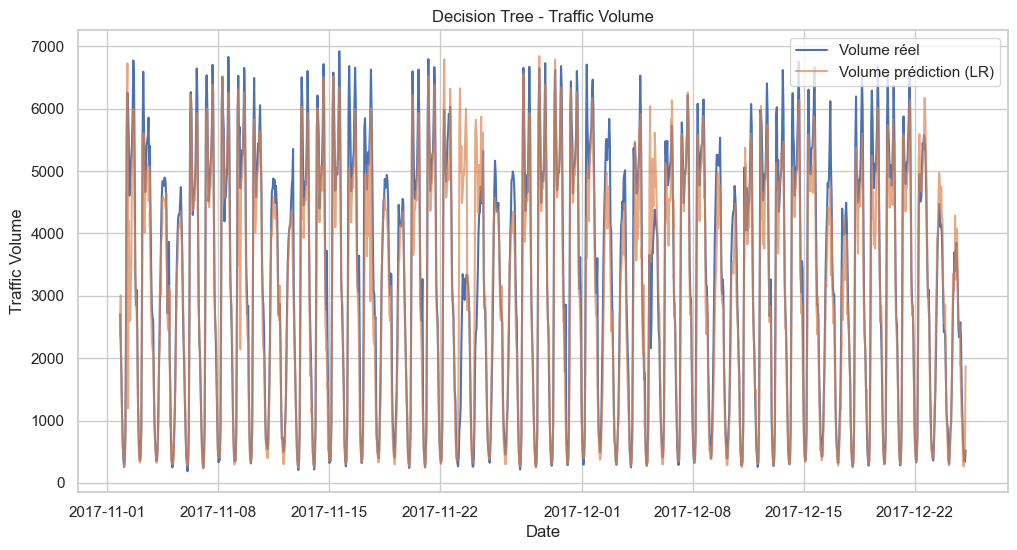

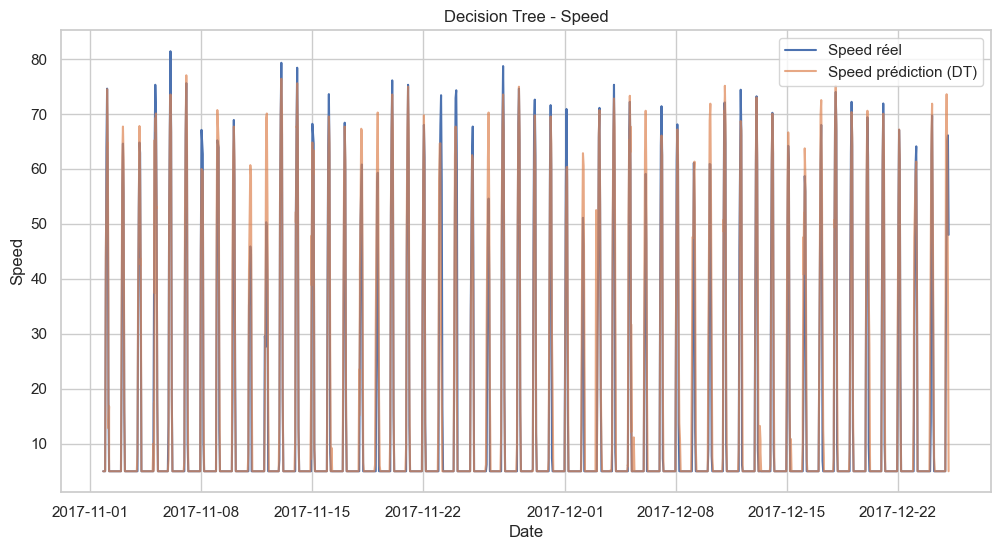

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Charger et nettoyer le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')

# Convertir date_time en datetime et mettre en index
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Créer variable binaire pour jour férié (0 = pas holiday, 1 = holiday)
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

# Supprimer lignes sans traffic_volume, speed ou weather_main
data = data.dropna(subset=['traffic_volume', 'speed', 'weather_main'])

# Features temporelles
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

# One-hot encoding météo
weather_dummies = pd.get_dummies(data['weather_main'], prefix='weather')
data = pd.concat([data, weather_dummies], axis=1)

# Sélection des features
feature_cols = ['hour', 'day_of_week', 'month', 'is_holiday'] + list(weather_dummies.columns)
X = data[feature_cols]
y = data[['traffic_volume', 'speed']]

# Split train/test (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Normalisation 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Entraîner Decision Tree multi-output
dt = DecisionTreeRegressor(random_state=42)
multi_dt = MultiOutputRegressor(dt)
multi_dt.fit(X_train_scaled, y_train)

# Prédictions
y_pred = multi_dt.predict(X_test_scaled)

# Évaluation
rmse_volume = np.sqrt(mean_squared_error(y_test['traffic_volume'], y_pred[:,0]))
mae_volume = mean_absolute_error(y_test['traffic_volume'], y_pred[:,0])

rmse_speed = np.sqrt(mean_squared_error(y_test['speed'], y_pred[:,1]))
mae_speed = mean_absolute_error(y_test['speed'], y_pred[:,1])

print(f"Decision Tree Volume - RMSE: {rmse_volume:.2f}, MAE: {mae_volume:.2f}")
print(f"Decision Tree Speed  - RMSE: {rmse_speed:.2f}, MAE: {mae_speed:.2f}")

# Visualisation
# Traffic Volume
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:1500], y_test['traffic_volume'][:1500], label='Volume réel')
plt.plot(y_test.index[:1500], y_pred[:,0][:1500], label='Volume prédiction (LR)', alpha=0.7)
plt.title("Decision Tree - Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Speed
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:1500], y_test['speed'][:1500], label='Speed réel')
plt.plot(y_test.index[:1500], y_pred[:,1][:1500], label='Speed prédiction (DT)', alpha=0.7)
plt.title("Decision Tree - Speed")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()



**Dans ce projet, le modèle Decision Tree a été utilisé en configuration multivariée et multi-output afin de prédire simultanément le volume de trafic et la vitesse en utilisant plusieurs variables explicatives (heure, météo, jour de la semaine, etc.).**

**Nous observons donc une meilleure performance globale avec le Decision Tree comparé au modèle Persistence.
Ce résultat confirme que le trafic routier ne suit pas une dynamique suffisamment simple pour être correctement modélisée par le Persistence, et qu’un modèle apprenant des relations plus complexes, comme le Decision Tree, est mieux adapté à ce type de données.**

**D-RANDOM FOREST**

Random Forest Volume - RMSE: 564.19, MAE: 316.65
Random Forest Speed  - RMSE: 5.36, MAE: 1.74


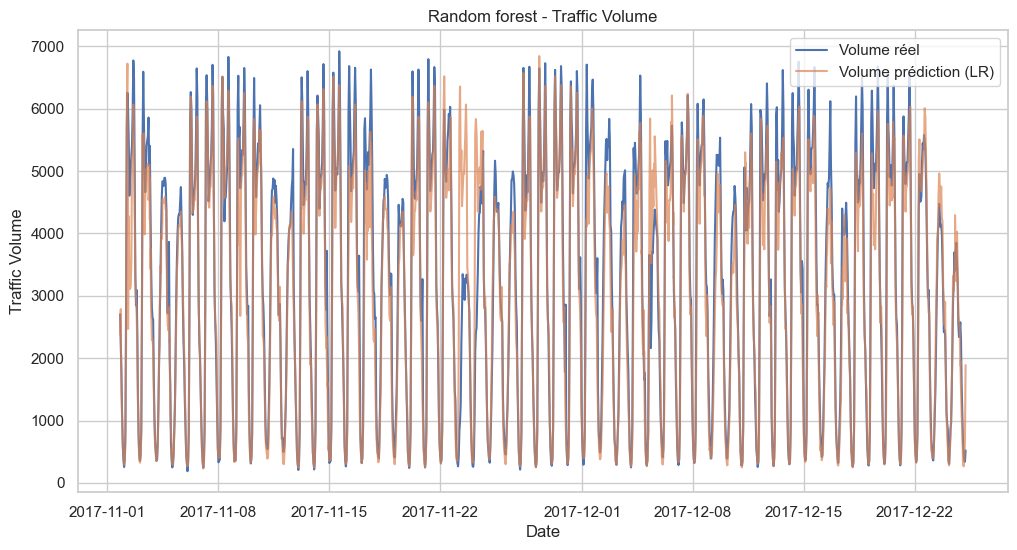

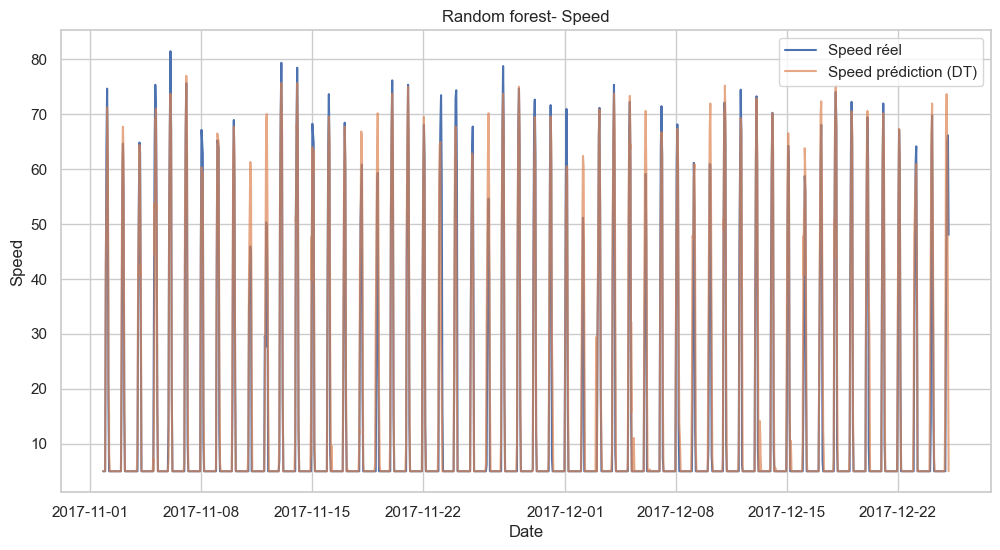

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Charger et nettoyer le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')

# Convertir date_time en datetime et mettre en index
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Créer variable binaire pour jour férié (0 = pas holiday, 1 = holiday)
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

# Supprimer lignes sans traffic_volume, speed ou weather_main
data = data.dropna(subset=['traffic_volume', 'speed', 'weather_main'])

# Features temporelles
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

# One-hot encoding météo
weather_dummies = pd.get_dummies(data['weather_main'], prefix='weather')
data = pd.concat([data, weather_dummies], axis=1)

# Sélection des features
feature_cols = ['hour', 'day_of_week', 'month', 'is_holiday'] + list(weather_dummies.columns)
X = data[feature_cols]
y = data[['traffic_volume', 'speed']]

# Split train/test (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

#Normalisation
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner Random Forest multi-output
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train_scaled, y_train)

#  Prédictions
y_pred = multi_rf.predict(X_test_scaled)

# Évaluation
rmse_volume = np.sqrt(mean_squared_error(y_test['traffic_volume'], y_pred[:,0]))
mae_volume = mean_absolute_error(y_test['traffic_volume'], y_pred[:,0])

rmse_speed = np.sqrt(mean_squared_error(y_test['speed'], y_pred[:,1]))
mae_speed = mean_absolute_error(y_test['speed'], y_pred[:,1])

print(f"Random Forest Volume - RMSE: {rmse_volume:.2f}, MAE: {mae_volume:.2f}")
print(f"Random Forest Speed  - RMSE: {rmse_speed:.2f}, MAE: {mae_speed:.2f}")

# Visualisation
# Traffic Volume
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:1500], y_test['traffic_volume'][:1500], label='Volume réel')
plt.plot(y_test.index[:1500], y_pred[:,0][:1500], label='Volume prédiction (LR)', alpha=0.7)
plt.title("Random forest - Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

# Speed
plt.figure(figsize=(12,6))
plt.plot(y_test.index[:1500], y_test['speed'][:1500], label='Speed réel')
plt.plot(y_test.index[:1500], y_pred[:,1][:1500], label='Speed prédiction (DT)', alpha=0.7)
plt.title("Random forest- Speed")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()


**Le Random Forest démontre une meilleure capacité prédictive que le Persistence Model, confirmant que des modèles non linéaires et basés sur plusieurs features sont mieux adaptés à la prévision du trafic routier et de la vitesse.**

# <a id="53">Performances des modèles</a>

**TARGET: TRAFFIC_VOLUME**

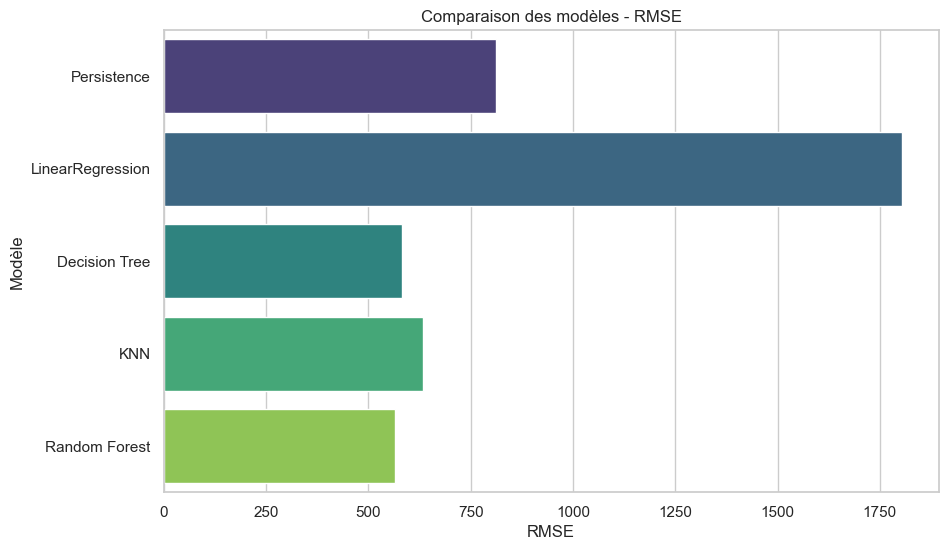

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Persistence','LinearRegression', 'Decision Tree', 'KNN', 'Random Forest']
rmse_values = [ 811.81,1803.87, 583.42, 633.63, 564.19] 

# Créer le DataFrame pour la visualisation
df_rmse = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values
})

# Tracer le graphique
plt.figure(figsize=(10,6))
sns.barplot(x='RMSE', y='Model', data=df_rmse, palette='viridis', orient='h')
plt.title('Comparaison des modèles - RMSE')
plt.xlabel('RMSE')
plt.ylabel('Modèle')
plt.show()


**TARGET: SPEED**

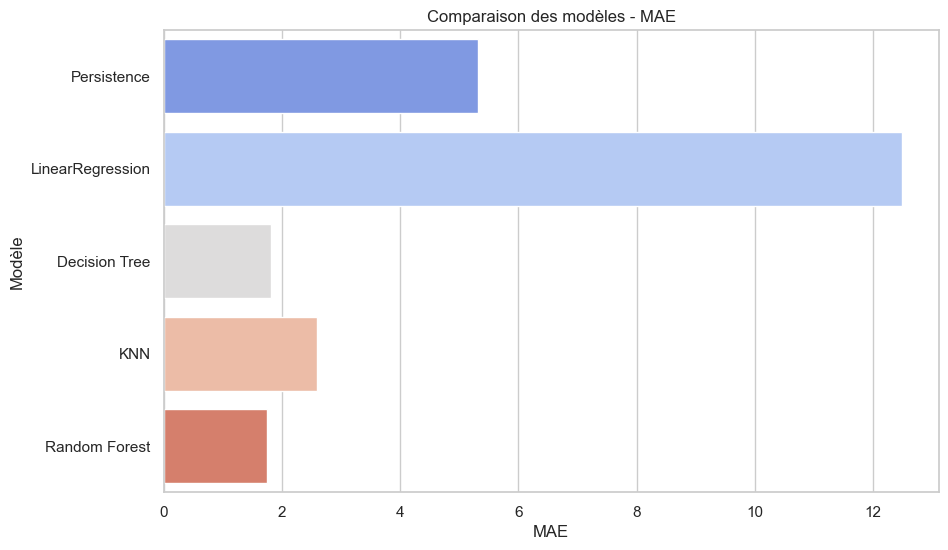

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Persistence','LinearRegression', 'Decision Tree', 'KNN', 'Random Forest']
mae_values = [ 5.31,12.49, 1.81, 2.59, 1.74]  

# Créer le DataFrame pour la visualisation
df_rmse = pd.DataFrame({
    'Model': models,
    'MAE': mae_values
})

# Tracer le graphique
plt.figure(figsize=(10,6))
sns.barplot(x='MAE', y='Model', data=df_rmse, palette='coolwarm', orient='h')
plt.title('Comparaison des modèles - MAE')
plt.xlabel('MAE')
plt.ylabel('Modèle')
plt.show()


**Les résultats montrent que le Random Forest est le modèle qui performe le mieux, avec des erreurs (RMSE et MAE) plus faibles que le modèle Persistence. Cette supériorité s’explique par sa capacité à exploiter plusieurs variables explicatives (heure, jour, météo, jours fériés) et à capturer des relations non linéaires entre ces variables et les cibles.**

**Ainsi, parmi les modèles de machine learning testés, le Random Forest constitue la meilleure approche, surpassant largement le modèle baseline (Persistence), et peut être utilisé comme référence pour toute comparaison ultérieure avec d’autres modèles plus avancés.**

## 2-TIME SERIE MODELS

**Utilisons ici, le random forest comme benchmark**

### A-ARIMA

ARIMA Volume - RMSE: 1976.11, MAE: 1733.70
ARIMA Speed  - RMSE: 19.88, MAE: 14.72


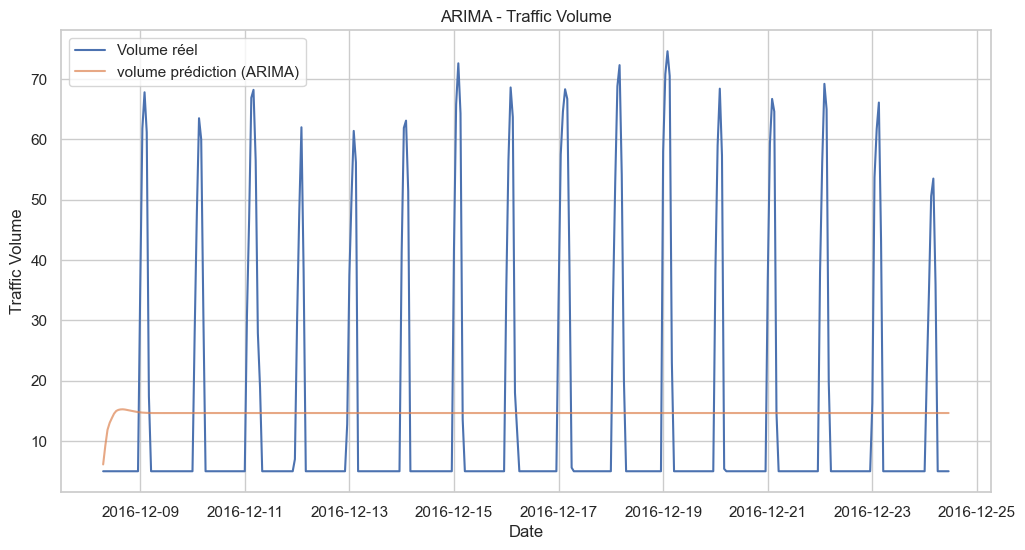

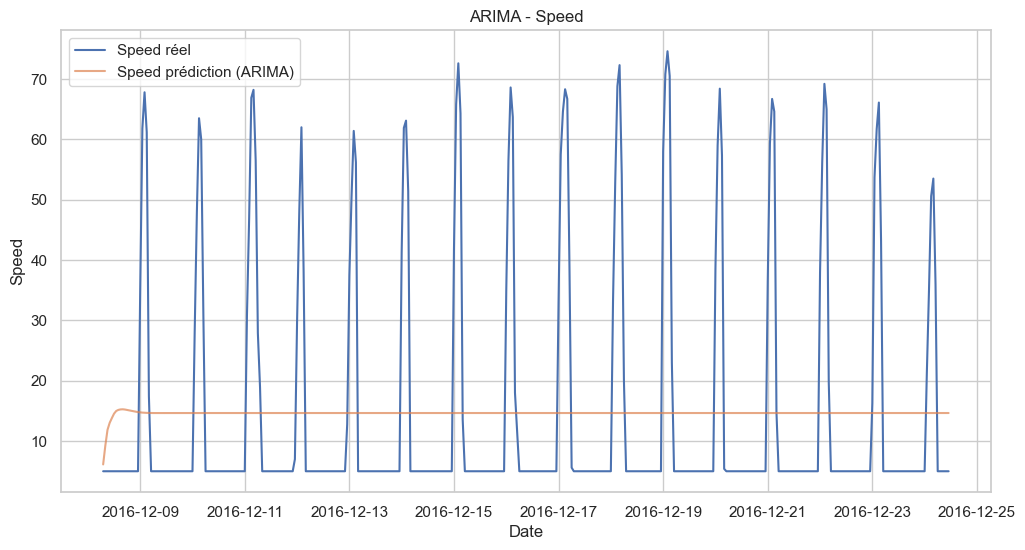

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Ignorer les warnings
warnings.filterwarnings("ignore")

# Charger le dataset
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Supprimer les NaN dans traffic_volume et speed
data = data.dropna(subset=['traffic_volume', 'speed'])

#  Split train/test (80/20)
train_size = int(len(data) * 0.6)
train_volume, test_volume = data['traffic_volume'][:train_size], data['traffic_volume'][train_size:]
train_speed, test_speed = data['speed'][:train_size], data['speed'][train_size:]

#  Modèle ARIMA pour traffic_volume

# Choisir l'ordre (p,d,q) 
arima_volume = ARIMA(train_volume, order=(4,0,4))
model_volume = arima_volume.fit()
pred_volume = model_volume.forecast(steps=len(test_volume))

# Évaluation
rmse_volume = np.sqrt(mean_squared_error(test_volume, pred_volume))
mae_volume = mean_absolute_error(test_volume, pred_volume)
print(f"ARIMA Volume - RMSE: {rmse_volume:.2f}, MAE: {mae_volume:.2f}")

#  Modèle ARIMA pour speed
arima_speed = ARIMA(train_speed, order=(4,0,4))
model_speed = arima_speed.fit()
pred_speed = model_speed.forecast(steps=len(test_speed))

# Évaluation
rmse_speed = np.sqrt(mean_squared_error(test_speed, pred_speed))
mae_speed = mean_absolute_error(test_speed, pred_speed)
print(f"ARIMA Speed  - RMSE: {rmse_speed:.2f}, MAE: {mae_speed:.2f}")

#  Visualisation
plt.figure(figsize=(12,6))
plt.plot(test_speed.index[:500], test_speed[:500], label='Volume réel')
plt.plot(test_speed.index[:500], pred_speed[:500], label='volume prédiction (ARIMA)', alpha=0.7)
plt.title("ARIMA - Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(test_speed.index[:500], test_speed[:500], label='Speed réel')
plt.plot(test_speed.index[:500], pred_speed[:500], label='Speed prédiction (ARIMA)', alpha=0.7)
plt.title("ARIMA - Speed")
plt.xlabel("Date")
plt.ylabel("Speed")
plt.legend()
plt.show()


**ARIMA est un modèle purement basé sur la dépendance temporelle de la série, sans prendre en compte les features exogènes comme l’heure, le jour de la semaine, les jours fériés ou la météo.**

**Hors le trafic routier dépend énormément de ces facteurs externes.**

**ARIMA ne peut « apprendre » que la tendance et la saisonnalité simple (comme un cycle quotidien ou hebdomadaire).Les variations ponctuelles (pluie, vacances, événements spéciaux) ne sont pas captées → prédictions souvent loin de la réalité → RMSE et MAE élevés.**

**En revanche, Random Forest utilise ces features directement et capture mieux les patterns complexes et non linéaires.ce qui explique, la mauvaise performance de ARIMA par rapport au benchmark**

## B-SARIMAX

**Le modèle SARIMAX (Seasonal ARIMA with eXogenous regressors) est une extension de ARIMA qui permet:**
**De modéliser la saisonnalité (SARIMA),**

**D’inclure des variables explicatives externes (exogenous variables), appelées X.**

**Dans notre cas, nous avons intégré la vitesse moyenne des véhicules (speed) comme variable explicative. Cette variable est fortement corrélée avec le volume de trafic : quand le trafic augmente, la vitesse diminue, et inversement.**

In [114]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Ignorer les warnings
warnings.filterwarnings("ignore")

# préparer data (assume date_time index déjà fait)
data = pd.read_csv('Metro_Interstate_Traffic_Volume_with_speed.csv')
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# features temporelles + lag de speed
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek
data['is_holiday'] = data['holiday'].apply(lambda x: 0 if pd.isna(x) else 1)

data['speed_lag1'] = data['speed'].shift(1)
# éventuellement d'autres lags : data['speed_lag24'] = data['speed'].shift(24)

# drop NA pour aligner
data = data.dropna(subset=['traffic_volume','speed_lag1'])

# exog inclut speed_lag1 + autres features si besoin
exog = data[['speed_lag1','hour','day_of_week','is_holiday']].astype(float)

# split
train_size = int(len(data)*0.8)
train_y = data['traffic_volume'][:train_size]
test_y  = data['traffic_volume'][train_size:]

train_exog = exog[:train_size]
test_exog  = exog[train_size:]

# SARIMAX
model = SARIMAX(train_y, order=(2,1,2), seasonal_order=(1,1,1,24), exog=train_exog,
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

pred = res.forecast(steps=len(test_y), exog=test_exog)

rmse = np.sqrt(mean_squared_error(test_y, pred))
mae  = mean_absolute_error(test_y, pred)
print("RMSE:", rmse, "MAE:", mae)


RMSE: 1766.0120127106597 MAE: 1559.0256422239886


**L’utilisation de SARIMAX avec la vitesse comme variable explicative montre l’intérêt des modèles multivariés pour la prévision du trafic. Elle illustre comment l’intégration d’informations externes pertinentes peut rendre les prédictions plus fiables et plus précises.Mais sa performance est toujours mauvaise par rapport au Random forest**

**En conclusion, on gardera toujours le random forest comme benchmark pour les models deep learning car il a une bonne performance que Arima et Sarimax**

## 3-DEEP LEARNING MODELS

**Pour les models Deep learning, on va prendre comme baseline le modele MLP(Multilayer Perceptron).**

 ***SINGLE STEP***

### A-MLP (MULTILAYER PERCEPTRON)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │         9,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,665 (69.00 KB)

 Trainable params: 17,665 (69.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0300 - val_loss: 0.0049
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101 - val_loss: 0.0060
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - val_loss: 0.0041
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0080 - val_loss: 0.0044
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073 - val_loss: 0.0039
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0071 - val_loss: 0.0038
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

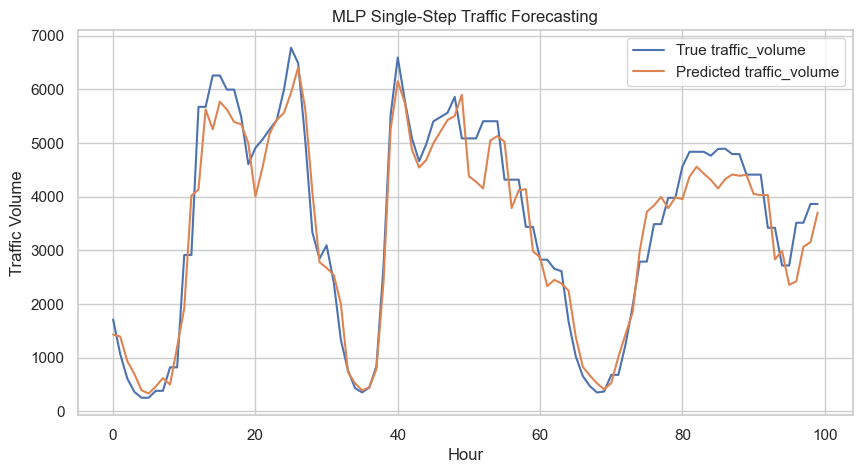

In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Sélection des colonnes 
cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

# Normalisation
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# CREATE SINGLE-STEP SEQUENCES

SEQ_LEN = 24  # 24h input
X, y = [], []

for i in range(len(scaled) - SEQ_LEN):
    X.append(scaled[i:i+SEQ_LEN])
    y.append(scaled[i+SEQ_LEN, 0])  # single-step traffic_volume

X = np.array(X)
y = np.array(y)

# Aplatir X pour le MLP
X = X.reshape(X.shape[0], -1)  # shape (samples, SEQ_LEN * features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# BUILD MLP MODEL
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # single-step output

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

# TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

#  PREDICTION
preds = model.predict(X_test)

# Inversion du scaling
def invert_scaling(pred, col_index=0):
    temp = np.zeros((len(pred), df.shape[1]))
    temp[:, col_index] = pred[:,0] if pred.ndim > 1 else pred
    return scaler.inverse_transform(temp)[:, col_index]

pred_real = invert_scaling(preds)
true_real = invert_scaling(y_test)

#  ÉVALUATION
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"MLP Single-Step - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# VISUALISATION
plt.figure(figsize=(10,5))
plt.plot(true_real[:100], label="True traffic_volume")
plt.plot(pred_real[:100], label="Predicted traffic_volume")
plt.title("MLP Single-Step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### B-TRANSFORMER

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 24, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 3)     │        963 │ input_layer_14[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 24, 3)     │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 24, 3)     │          0 │ dropout_16[0][0], │
│                     │                   │            │ input_layer_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 3)     │          6 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 72)        │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 64)        │      4,672 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 64)        │          0 │ dense_28[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1)         │         65 │ dropout_17[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,706 (22.29 KB)

 Trainable params: 5,706 (22.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.1217 - val_loss: 0.0097
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0185 - val_loss: 0.0069
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0133 - val_loss: 0.0048
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0112 - val_loss: 0.0056
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0102 - val_loss: 0.0046
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0093 - val_loss: 0.0049
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0092 - val_loss: 0.0048
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0090 - val_loss: 0.0044
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0089 - val_loss: 0.0039
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0088 - val_loss: 0.0039
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/ste

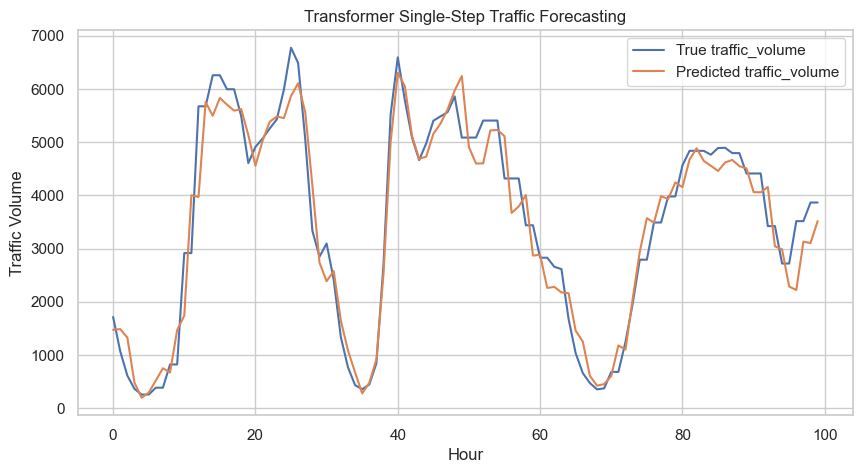

In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE SINGLE-STEP SEQUENCES
SEQ_LEN = 24
X, y = [], []

for i in range(len(scaled) - SEQ_LEN):
    X.append(scaled[i:i+SEQ_LEN])
    y.append(scaled[i+SEQ_LEN, 0])  # single-step traffic_volume

X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# BUILD TRANSFORMER MODEL
input_layer = Input(shape=(SEQ_LEN, X.shape[2]))

# Multi-Head Attention
attn_output = MultiHeadAttention(num_heads=4, key_dim=16)(input_layer, input_layer)
attn_output = Dropout(0.1)(attn_output)
attn_output = LayerNormalization(epsilon=1e-6)(attn_output + input_layer)

# Flatten pour MLP final
flat = Flatten()(attn_output)
dense = Dense(64, activation='relu')(flat)
dense = Dropout(0.2)(dense)
output = Dense(1)(dense)  # single-step output

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mse')
model.summary()

# TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# PREDICTION & INVERSION SCALING
preds = model.predict(X_test)

def invert_scaling(pred, col_index=0):
    temp = np.zeros((len(pred), df.shape[1]))
    temp[:, col_index] = pred[:,0] if pred.ndim > 1 else pred
    return scaler.inverse_transform(temp)[:, col_index]

pred_real = invert_scaling(preds)
true_real = invert_scaling(y_test)

# ÉVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"Transformer Single-Step - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# 7️⃣ VISUALISATION
plt.figure(figsize=(10,5))
plt.plot(true_real[:100], label="True traffic_volume")
plt.plot(pred_real[:100], label="Predicted traffic_volume")
plt.title("Transformer Single-Step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### C-CNN (CONVOLUTIONAL NEURAL NETWORK)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 22, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │        22,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0490 - val_loss: 0.0065
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0105 - val_loss: 0.0043
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0091 - val_loss: 0.0042
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0081 - val_loss: 0.0038
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0079 - val_loss: 0.0039
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0073 - val_loss: 0.0035
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0069 - val_loss: 0.0036
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0064 - val_loss: 0.0035
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0064 - val_loss: 0.0036
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

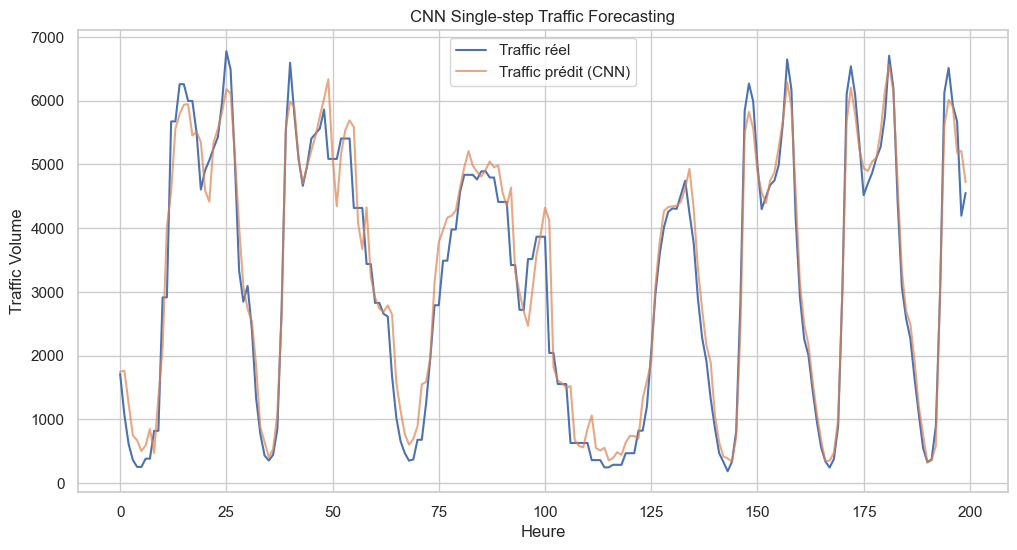

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Sélection des colonnes existantes
cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

# Normalisation
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE SINGLE-STEP SEQUENCES
SEQ_IN = 24  # 24h input pour prédire l'heure suivante

def create_singlestep_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i : i + seq_len])
        y.append(data[i + seq_len, 0])  # prédire traffic_volume à t+1
    return np.array(X), np.array(y)

X, y = create_singlestep_sequences(scaled, SEQ_IN)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# BUILD CNN MODEL
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQ_IN, X.shape[2])))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))   # prédiction single-step

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

# TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

#  PREDICTION
preds = model.predict(X_test)

#  INVERSION DU SCALING
def invert_scaling_single(pred, col_index=0):
    temp = np.zeros((len(pred), df.shape[1]))
    temp[:, col_index] = pred[:, 0]
    return scaler.inverse_transform(temp)[:, col_index]

pred_real = invert_scaling_single(preds)
true_real = invert_scaling_single(y_test.reshape(-1,1))

# ÉVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"CNN Single-step - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

#  VISUALISATION
plt.figure(figsize=(12,6))
plt.plot(true_real[:200], label="Traffic réel")
plt.plot(pred_real[:200], label="Traffic prédit (CNN)", alpha=0.7)
plt.title("CNN Single-step Traffic Forecasting")
plt.xlabel("Heure")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### D-LSTM (LONG SHORT-TERM MEMORY NETWORKS)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,521 (76.25 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 0.0422 - val_loss: 0.0052
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0096 - val_loss: 0.0051
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0084 - val_loss: 0.0045
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0078 - val_loss: 0.0042
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0070 - val_loss: 0.0040
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0068 - val_loss: 0.0040
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0067 - val_loss: 0.0034
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0064 - val_loss: 0.0033
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 12/20
603/603 ━━━━━━━━━━━━

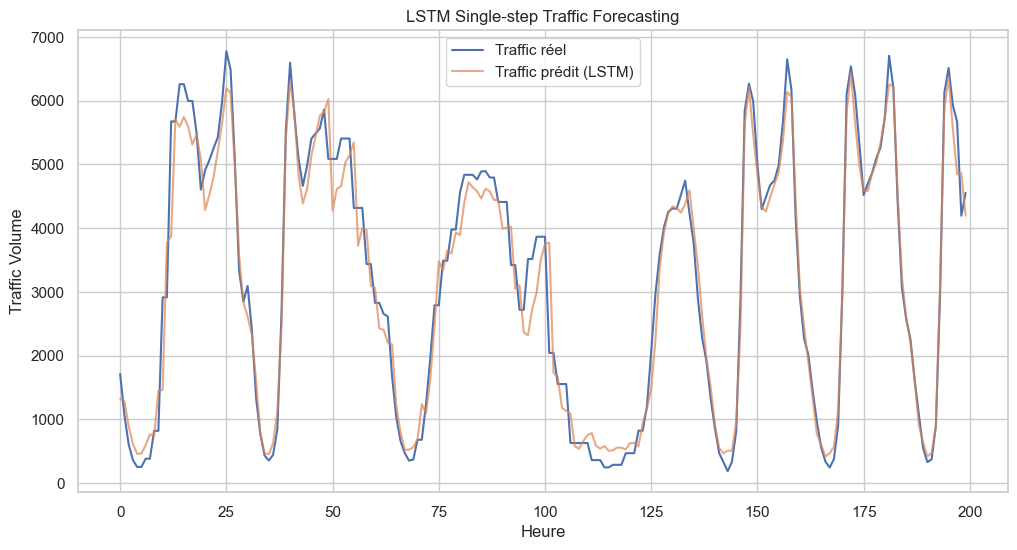

In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

# LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Sélection des colonnes existantes
cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

# Normalisation
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE SINGLE-STEP SEQUENCES
SEQ_IN = 24  # 24h input pour prédire l'heure suivante

def create_singlestep_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i : i + seq_len])
        y.append(data[i + seq_len, 0])  # prédire traffic_volume à t+1
    return np.array(X), np.array(y)

X, y = create_singlestep_sequences(scaled, SEQ_IN)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# BUILD LSTM MODEL
model = Sequential()
model.add(LSTM(64, input_shape=(SEQ_IN, X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))   # prédiction single-step

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

#PREDICTION
preds = model.predict(X_test)

#  INVERSION DU SCALING
def invert_scaling_single(pred, col_index=0):
    temp = np.zeros((len(pred), df.shape[1]))
    temp[:, col_index] = pred[:, 0]
    return scaler.inverse_transform(temp)[:, col_index]

pred_real = invert_scaling_single(preds)
true_real = invert_scaling_single(y_test.reshape(-1,1))

#  ÉVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"LSTM Single-step - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

#  VISUALISATION
plt.figure(figsize=(12,6))
plt.plot(true_real[:200], label="Traffic réel")
plt.plot(pred_real[:200], label="Traffic prédit (LSTM)", alpha=0.7)
plt.title("LSTM Single-step Traffic Forecasting")
plt.xlabel("Heure")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### E-GRU (Gated Recurrent Unit)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 64)             │        13,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.0280 - val_loss: 0.0048
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0078 - val_loss: 0.0043
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0072 - val_loss: 0.0039
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0061 - val_loss: 0.0031
Epoch 12/20
603/603 ━━━━━━━━━━━━

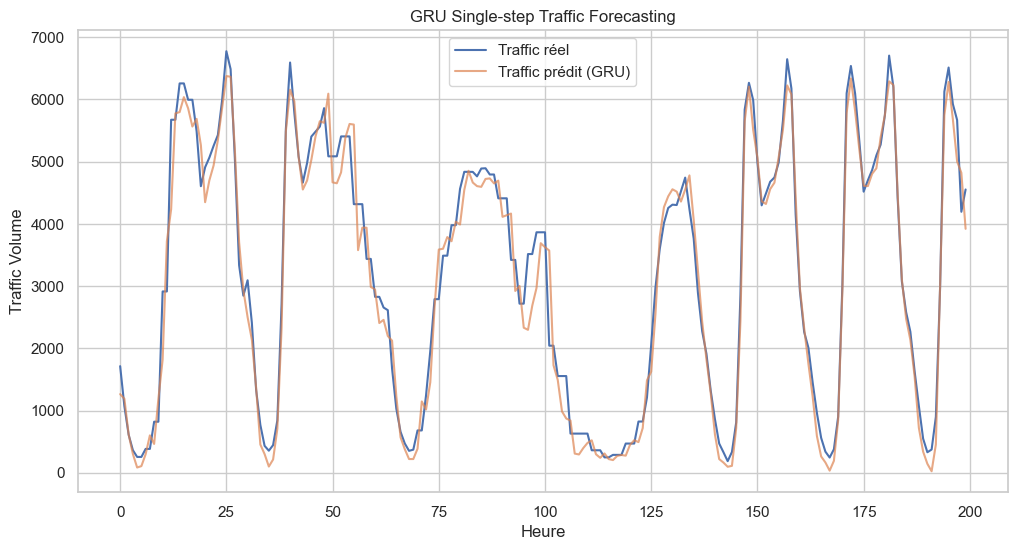

In [119]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Sélection des colonnes existantes
cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

# Normalisation
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# CREATE SINGLE-STEP SEQUENCES
SEQ_IN = 24  # 24h input pour prédire l'heure suivante

def create_singlestep_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i : i + seq_len])
        y.append(data[i + seq_len, 0])  # prédire traffic_volume à t+1
    return np.array(X), np.array(y)

X, y = create_singlestep_sequences(scaled, SEQ_IN)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# BUILD GRU MODEL
model = Sequential()
model.add(GRU(64, input_shape=(SEQ_IN, X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))   # prédiction single-step

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

#  PREDICTION

preds = model.predict(X_test)

# INVERSION DU SCALING
def invert_scaling_single(pred, col_index=0):
    temp = np.zeros((len(pred), df.shape[1]))
    temp[:, col_index] = pred[:, 0]
    return scaler.inverse_transform(temp)[:, col_index]

pred_real = invert_scaling_single(preds)
true_real = invert_scaling_single(y_test.reshape(-1,1))

#  ÉVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"GRU Single-step - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

#  VISUALISATION
plt.figure(figsize=(12,6))
plt.plot(true_real[:200], label="Traffic réel")
plt.plot(pred_real[:200], label="Traffic prédit (GRU)", alpha=0.7)
plt.title("GRU Single-step Traffic Forecasting")
plt.xlabel("Heure")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


## F-CNN-LSTM

Colonnes disponibles : Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'speed', 'month', 'hour',
       'day_of_week'],
      dtype='object')


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 22, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,353 (142.00 KB)

 Trainable params: 36,353 (142.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0367 - val_loss: 0.0062
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0089 - val_loss: 0.0048
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0067 - val_loss: 0.0036
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0058 - val_loss: 0.0036
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0056 - val_loss: 0.0037
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 

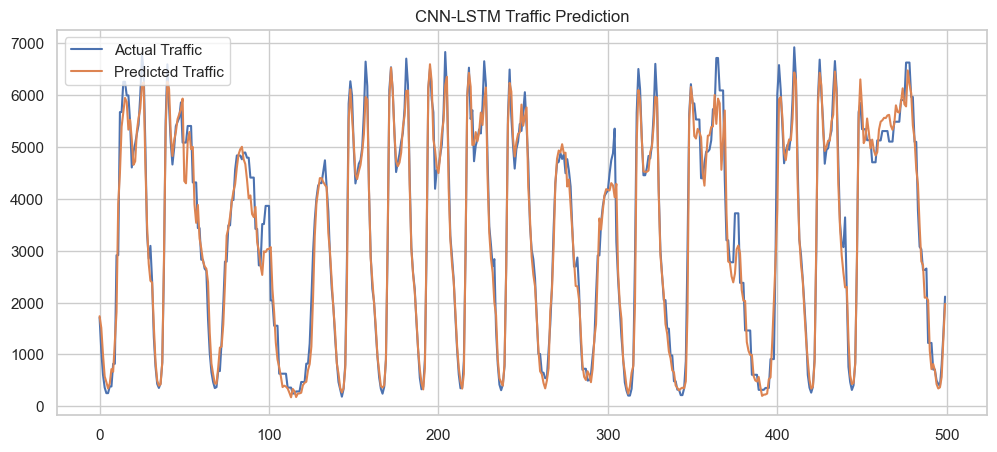

In [129]:
### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings

# Ignorer les warnings
warnings.filterwarnings("ignore")

# 1. LOAD DATA

data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")

data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)


# 2. FEATURE ENGINEERING 
data['month'] = data.index.month
data['hour'] = data.index.hour
data['day_of_week'] = data.index.dayofweek

# Vérifier les colonnes
print("Colonnes disponibles :", data.columns)

# 3. FEATURES + TARGET

features = ['traffic_volume','speed','temp','month','hour','day_of_week']
df = data[features].dropna()

# 4. NORMALISATION
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# 5. CREATE SEQUENCES
def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len][0])  # traffic_volume
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled, SEQ_LEN)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 6. BUILD CNN-LSTM MODEL
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                 input_shape=(SEQ_LEN, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

# 7. TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# 8. EVALUATION
preds = model.predict(X_test)

# Inverse scaling (colonne 0 = traffic_volume)
scaled_full = np.zeros((len(preds), df.shape[1]))
scaled_full[:,0] = preds[:,0]
pred_real = scaler.inverse_transform(scaled_full)[:,0]

scaled_test = np.zeros((len(y_test), df.shape[1]))
scaled_test[:,0] = y_test
true_real = scaler.inverse_transform(scaled_test)[:,0]

rmse = np.sqrt(np.mean((pred_real - true_real)**2))
print("RMSE =", rmse)

# 9. VISUALISATION
plt.figure(figsize=(12,5))
plt.plot(true_real[:500], label="Actual Traffic")
plt.plot(pred_real[:500], label="Predicted Traffic")
plt.title("CNN-LSTM Traffic Prediction")
plt.legend()
plt.show()


***MULTI-STEP***

***On va predire les 6 prochaines heures.***

### A-MLP

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 128)            │         9,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,990 (70.27 KB)

 Trainable params: 17,990 (70.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0532 - val_loss: 0.0189
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0261 - val_loss: 0.0161
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0240 - val_loss: 0.0154
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0229 - val_loss: 0.0153
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0216 - val_loss: 0.0157
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0212 - val_loss: 0.0137
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0208 - val_loss: 0.0137
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0203 - val_loss: 0.0131
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0196 - val_loss: 0.0132
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0196 - val_loss: 0.0125
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0190 - val_loss: 0.0142
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

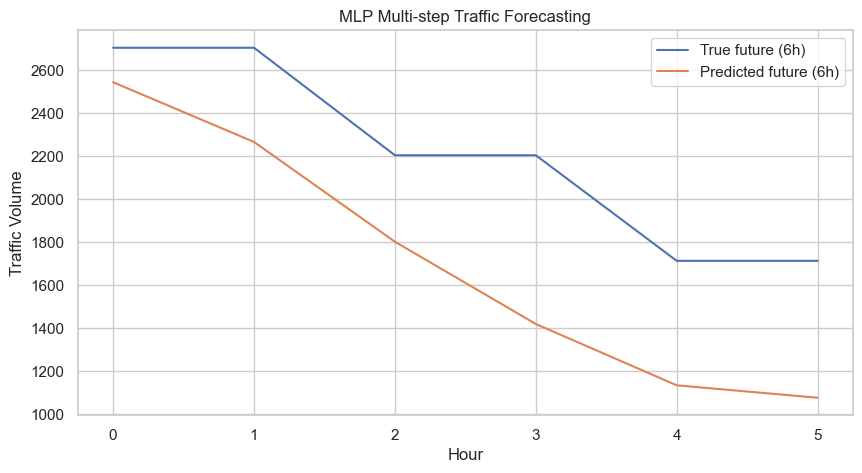

In [121]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

# LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE MULTI-STEP SEQUENCES
SEQ_IN = 24    # 24h input
SEQ_OUT = 6    # prédire 6h

def create_multistep_sequences(data, seq_len_in, seq_len_out):
    X, y = [], []
    for i in range(len(data) - seq_len_in - seq_len_out):
        X.append(data[i : i + seq_len_in])
        y.append(data[i + seq_len_in : i + seq_len_in + seq_len_out, 0])  # prédire traffic_volume
    return np.array(X), np.array(y)

X, y = create_multistep_sequences(scaled, SEQ_IN, SEQ_OUT)

# Pour MLP, on aplatit les séquences
X = X.reshape(X.shape[0], -1)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  BUILD MLP MODEL
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(SEQ_OUT))   # multi-step output

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# PREDICTION
preds = model.predict(X_test)

#  INVERT SCALING FOR TRAFFIC_VOLUME
def invert_scaling_multistep(pred, col_index=0):
    pred_inv = []
    for i in range(pred.shape[1]):
        temp = np.zeros((pred.shape[0], df.shape[1]))
        temp[:, col_index] = pred[:, i]
        pred_inv.append(scaler.inverse_transform(temp)[:, col_index])
    return np.array(pred_inv).T

pred_real = invert_scaling_multistep(preds)
true_real = invert_scaling_multistep(y_test)

# EVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"MLP - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# VISUALISATION 
plt.figure(figsize=(10,5))
plt.plot(true_real[0], label="True future (6h)")
plt.plot(pred_real[0], label="Predicted future (6h)")
plt.title("MLP Multi-step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### B-TRANFORMER

Model: "functional_76"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20      │ (None, 24, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 3)     │      1,923 │ input_layer_20[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 3)     │          6 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 72)        │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 64)        │      4,672 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 64)        │          0 │ dense_41[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 6)         │        390 │ dropout_24[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,991 (27.31 KB)

 Trainable params: 6,991 (27.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.1390 - val_loss: 0.0362
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0447 - val_loss: 0.0266
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0367 - val_loss: 0.0256
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0341 - val_loss: 0.0213
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0322 - val_loss: 0.0202
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0300 - val_loss: 0.0221
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0299 - val_loss: 0.0209
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0284 - val_loss: 0.0223
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0290 - val_loss: 0.0190
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0279 - val_loss: 0.0276
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0282 - val_loss: 0.0183
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7

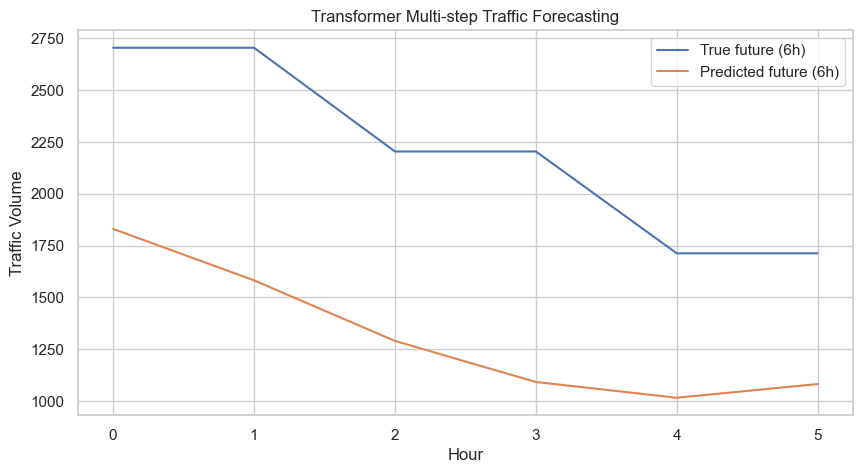

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA

data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE MULTI-STEP SEQUENCES
SEQ_IN = 24    # 24h input
SEQ_OUT = 6    # prédire 6h

def create_multistep_sequences(data, seq_len_in, seq_len_out):
    X, y = [], []
    for i in range(len(data) - seq_len_in - seq_len_out):
        X.append(data[i : i + seq_len_in])
        y.append(data[i + seq_len_in : i + seq_len_in + seq_len_out, 0])  # traffic_volume
    return np.array(X), np.array(y)

X, y = create_multistep_sequences(scaled, SEQ_IN, SEQ_OUT)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  BUILD SIMPLE TRANSFORMER MODEL
input_layer = Input(shape=(SEQ_IN, X.shape[2]))
# Multi-Head Attention
attn_output = MultiHeadAttention(num_heads=4, key_dim=32)(input_layer, input_layer)
attn_output = LayerNormalization()(attn_output)
attn_output = Flatten()(attn_output)
attn_output = Dense(64, activation='relu')(attn_output)
attn_output = Dropout(0.2)(attn_output)
output_layer = Dense(SEQ_OUT)(attn_output)  # multi-step output

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# PREDICTION
preds = model.predict(X_test)

#  INVERT SCALING FOR TRAFFIC_VOLUME
def invert_scaling_multistep(pred, col_index=0):
    pred_inv = []
    for i in range(pred.shape[1]):
        temp = np.zeros((pred.shape[0], df.shape[1]))
        temp[:, col_index] = pred[:, i]
        pred_inv.append(scaler.inverse_transform(temp)[:, col_index])
    return np.array(pred_inv).T

pred_real = invert_scaling_multistep(preds)
true_real = invert_scaling_multistep(y_test)

#  EVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"Transformer - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

#  VISUALISATION 
plt.figure(figsize=(10,5))
plt.plot(true_real[0], label="True future (6h)")
plt.plot(pred_real[0], label="Predicted future (6h)")
plt.title("Transformer Multi-step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### C-SEQ2SEQ

Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 24, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_22      │ (None, 6, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ [(None, 64),      │     17,408 │ input_layer_21[0… │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ [(None, 6, 64),   │     16,896 │ input_layer_22[0… │
│                     │ (None, 64),       │            │ lstm_7[0][1],     │
│                     │ (None, 64)]       │            │ lstm_7[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 6, 1)      │         65 │ lstm_8[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 34,369 (134.25 KB)

 Trainable params: 34,369 (134.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.0530 - val_loss: 0.0236
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0274 - val_loss: 0.0187
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0249 - val_loss: 0.0181
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0221 - val_loss: 0.0150
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.0212 - val_loss: 0.0146
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0195 - val_loss: 0.0129
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0182 - val_loss: 0.0121
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0176 - val_loss: 0.0116
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - loss: 0.0169 - val_loss: 0.0110
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0165 - val_loss: 0.0113
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.0157 - val_loss: 0.0111
Epoch 12/20
603/603 ━━━━━━━━━━

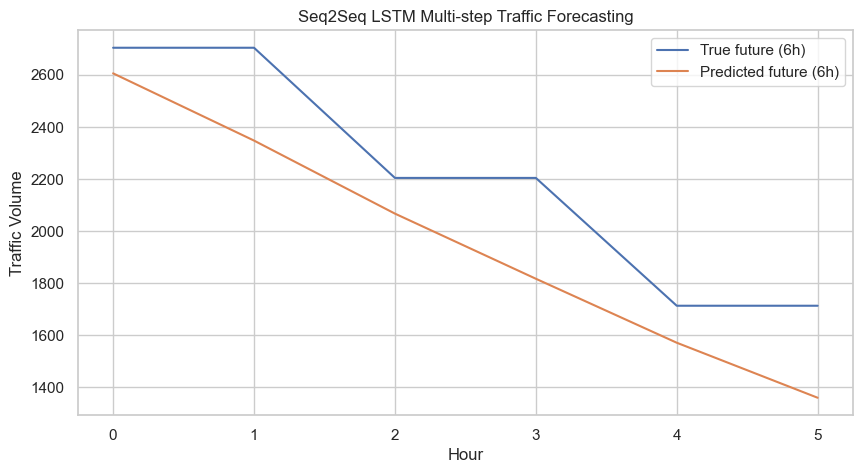

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

# LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE MULTI-STEP SEQUENCES-
SEQ_IN = 24    # 24h input
SEQ_OUT = 6    # prédire 6h

def create_seq2seq_sequences(data, seq_in, seq_out):
    X, y = [], []
    for i in range(len(data) - seq_in - seq_out):
        X.append(data[i : i + seq_in])
        y.append(data[i + seq_in : i + seq_in + seq_out, 0])  # prédire traffic_volume
    return np.array(X), np.array(y)

X, y = create_seq2seq_sequences(scaled, SEQ_IN, SEQ_OUT)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  BUILD SEQ2SEQ MODEL
latent_dim = 64

# Encoder
encoder_inputs = Input(shape=(SEQ_IN, X.shape[2]))
encoder_lstm = LSTM(latent_dim, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(SEQ_OUT, 1))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(1)
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  PREPARE DECODER INPUTS
decoder_input_train = np.zeros((y_train.shape[0], SEQ_OUT, 1))
decoder_input_test = np.zeros((y_test.shape[0], SEQ_OUT, 1))

#  TRAINING
history = model.fit(
    [X_train, decoder_input_train], y_train[:,:,np.newaxis],
    validation_data=([X_test, decoder_input_test], y_test[:,:,np.newaxis]),
    epochs=20,
    batch_size=64,
    verbose=1
)

#  PREDICTION
preds = model.predict([X_test, decoder_input_test])
preds = preds[:,:,0]

# Inversion du scaling pour traffic_volume
def invert_scaling_multistep(pred, col_index=0):
    pred_inv = []
    for i in range(pred.shape[1]):
        temp = np.zeros((pred.shape[0], df.shape[1]))
        temp[:, col_index] = pred[:, i]
        pred_inv.append(scaler.inverse_transform(temp)[:, col_index])
    return np.array(pred_inv).T

pred_real = invert_scaling_multistep(preds)
true_real = invert_scaling_multistep(y_test)

#  EVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"Seq2Seq LSTM - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# VISUALISATION 
plt.figure(figsize=(10,5))
plt.plot(true_real[0], label="True future (6h)")
plt.plot(pred_real[0], label="Predicted future (6h)")
plt.title("Seq2Seq LSTM Multi-step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### D-CNN-GRU

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 22, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,878 (108.90 KB)

 Trainable params: 27,878 (108.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.0604 - val_loss: 0.0201
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0269 - val_loss: 0.0167
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0230 - val_loss: 0.0145
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0208 - val_loss: 0.0135
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0196 - val_loss: 0.0122
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0184 - val_loss: 0.0117
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0178 - val_loss: 0.0139
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0176 - val_loss: 0.0114
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0168 - val_loss: 0.0112
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0166 - val_loss: 0.0112
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0162 - val_loss: 0.0108
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━

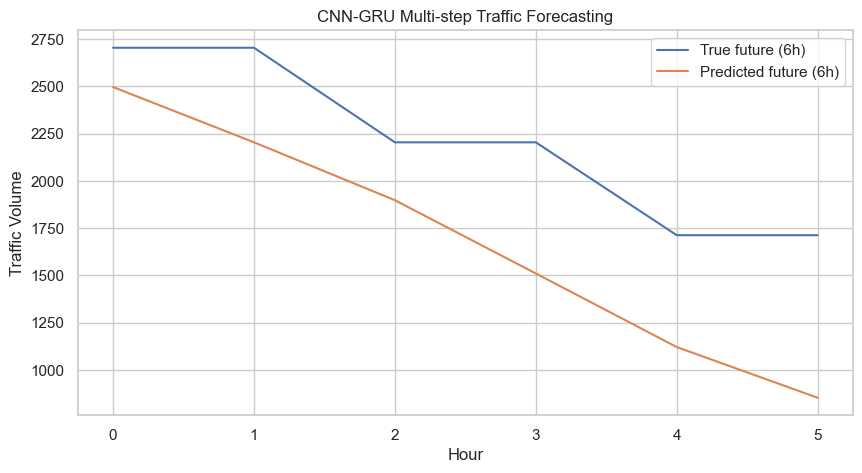

In [124]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE MULTI-STEP SEQUENCES
SEQ_IN = 24    # 24h input
SEQ_OUT = 6    # prédire 6h

def create_multistep_sequences(data, seq_len_in, seq_len_out):
    X, y = [], []
    for i in range(len(data) - seq_len_in - seq_len_out):
        X.append(data[i : i + seq_len_in])
        y.append(data[i + seq_len_in : i + seq_len_in + seq_len_out, 0])  # prédire traffic_volume
    return np.array(X), np.array(y)

X, y = create_multistep_sequences(scaled, SEQ_IN, SEQ_OUT)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  BUILD CNN-GRU MODEL
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQ_IN, X.shape[2])))
model.add(MaxPooling1D(2))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(SEQ_OUT))   # multi-step output

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

#  PREDICTION
preds = model.predict(X_test)

#  INVERT SCALING FOR TRAFFIC_VOLUME
def invert_scaling_multistep(pred, col_index=0):
    pred_inv = []
    for i in range(pred.shape[1]):
        temp = np.zeros((pred.shape[0], df.shape[1]))
        temp[:, col_index] = pred[:, i]
        pred_inv.append(scaler.inverse_transform(temp)[:, col_index])
    return np.array(pred_inv).T

pred_real = invert_scaling_multistep(preds)
true_real = invert_scaling_multistep(y_test)

#  EVALUATION
rmse = np.sqrt(mean_squared_error(true_real, pred_real))
mae = mean_absolute_error(true_real, pred_real)
print(f"CNN-GRU - RMSE: {rmse:.2f}, MAE: {mae:.2f}")


# VISUALISATION 
plt.figure(figsize=(10,5))
plt.plot(true_real[0], label="True future (6h)")
plt.plot(pred_real[0], label="Predicted future (6h)")
plt.title("CNN-GRU Multi-step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### E-GRU

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                     │ (None, 64)             │        13,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,526 (60.65 KB)

 Trainable params: 15,526 (60.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - loss: 0.0752 - val_loss: 0.0206
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0283 - val_loss: 0.0172
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0250 - val_loss: 0.0156
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0225 - val_loss: 0.0139
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0207 - val_loss: 0.0135
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0194 - val_loss: 0.0132
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0189 - val_loss: 0.0119
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0181 - val_loss: 0.0117
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0182 - val_loss: 0.0118
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.0176 - val_loss: 0.0117
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.0171 - val_loss: 0.0117
Epoch 12/20
603/603 ━━━━━━━━━━

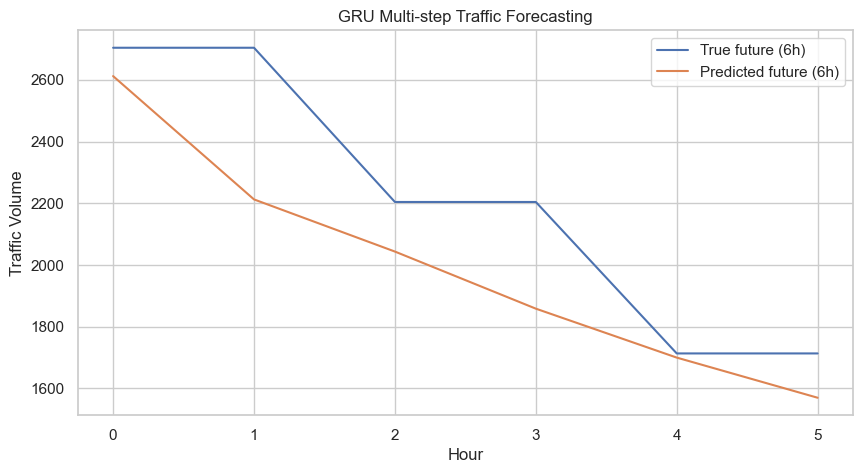

In [125]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Sélection des colonnes existantes
cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

# Normalisation
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# CREATE MULTI-STEP SEQUENCES
SEQ_IN = 24    # 24h input
SEQ_OUT = 6    # prédire 6h

def create_multistep_sequences(data, seq_len_in, seq_len_out):
    X, y = [], []
    for i in range(len(data) - seq_len_in - seq_len_out):
        X.append(data[i : i + seq_len_in])
        y.append(data[i + seq_len_in : i + seq_len_in + seq_len_out, 0])  # prédire traffic_volume
    return np.array(X), np.array(y)

X, y = create_multistep_sequences(scaled, SEQ_IN, SEQ_OUT)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# BUILD GRU MODEL
model = Sequential()
model.add(GRU(64, input_shape=(SEQ_IN, X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(SEQ_OUT))   # prédiction multi-step

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

# PREDICTION
preds = model.predict(X_test)

#  INVERSION DU SCALING
def invert_scaling_multistep(pred, col_index=0):
    pred_inv = []
    for i in range(pred.shape[1]):
        temp = np.zeros((pred.shape[0], df.shape[1]))
        temp[:, col_index] = pred[:, i]
        pred_inv.append(scaler.inverse_transform(temp)[:, col_index])
    return np.array(pred_inv).T

pred_real = invert_scaling_multistep(preds)
true_real = invert_scaling_multistep(y_test)

# ÉVALUATION
rmse_list = []
mae_list = []
for i in range(SEQ_OUT):
    rmse = np.sqrt(mean_squared_error(true_real[:, i], pred_real[:, i]))
    mae = mean_absolute_error(true_real[:, i], pred_real[:, i])
    rmse_list.append(rmse)
    mae_list.append(mae)
    print(f"Horizon +{i+1}h - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

rmse_mean = np.mean(rmse_list)
mae_mean = np.mean(mae_list)
print(f"\nMulti-step GRU - RMSE moyen: {rmse_mean:.2f}, MAE moyen: {mae_mean:.2f}")

# VISUALISATION 
plt.figure(figsize=(10,5))
plt.plot(true_real[0], label="True future (6h)")
plt.plot(pred_real[0], label="Predicted future (6h)")
plt.title("GRU Multi-step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()


### F-CNN-LSTM

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 22, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,942 (140.40 KB)

 Trainable params: 35,942 (140.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0666 - val_loss: 0.0220
Epoch 2/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0289 - val_loss: 0.0174
Epoch 3/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0246 - val_loss: 0.0159
Epoch 4/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0221 - val_loss: 0.0144
Epoch 5/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0211 - val_loss: 0.0143
Epoch 6/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0196 - val_loss: 0.0127
Epoch 7/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0191 - val_loss: 0.0124
Epoch 8/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0185 - val_loss: 0.0120
Epoch 9/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0182 - val_loss: 0.0122
Epoch 10/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0174 - val_loss: 0.0112
Epoch 11/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0171 - val_loss: 0.0112
Epoch 12/20
603/603 ━━━━━━━━━━━━━━━━━━━━ 

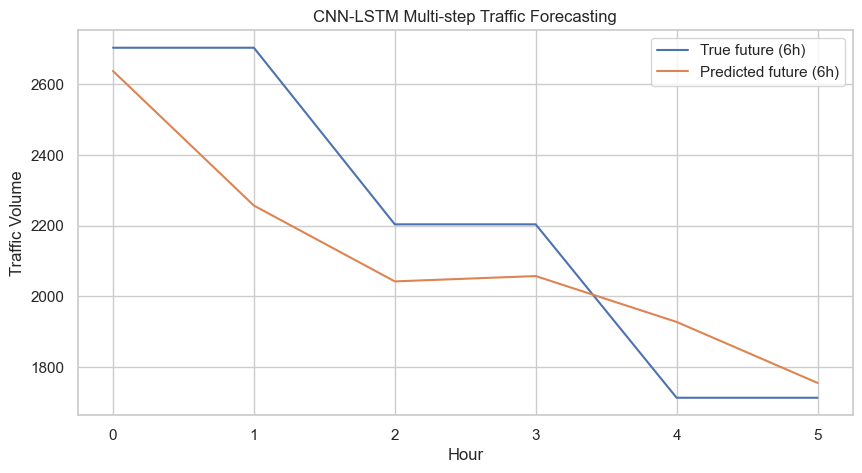

In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

#  LOAD & PREPARE DATA
data = pd.read_csv("Metro_Interstate_Traffic_Volume_with_speed.csv")
data['date_time'] = pd.to_datetime(data['date_time'], dayfirst=True)
data.set_index('date_time', inplace=True)

# Sélectionner les colonnes existantes
cols = [c for c in ['traffic_volume','speed','temp','month','hour','day_of_week'] if c in data.columns]
df = data[cols].dropna()

# Normalisation
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

#  CREATE MULTI-STEP SEQUENCES
SEQ_IN = 24    # 24h input
SEQ_OUT = 6    # prédire 6h

def create_multistep_sequences(data, seq_len_in, seq_len_out):
    X, y = [], []
    for i in range(len(data) - seq_len_in - seq_len_out):
        X.append(data[i : i + seq_len_in])
        y.append(data[i + seq_len_in : i + seq_len_in + seq_len_out, 0])  # prédire traffic_volume
    return np.array(X), np.array(y)

X, y = create_multistep_sequences(scaled, SEQ_IN, SEQ_OUT)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  BUILD CNN-LSTM MODEL
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQ_IN, X.shape[2])))
model.add(MaxPooling1D(2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(SEQ_OUT))   # prédiction multi-step

model.compile(optimizer=Adam(0.001), loss='mse')
model.summary()

#  TRAINING
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64,
    verbose=1
)

#  PREDICTION
preds = model.predict(X_test)

#  INVERSION DU SCALING POUR TRAFFIC_VOLUME (MULTI-STEP)
def invert_scaling_multistep(pred, col_index=0):
    pred_inv = []
    for i in range(pred.shape[1]):  # pour chaque pas de temps
        temp = np.zeros((pred.shape[0], df.shape[1]))
        temp[:, col_index] = pred[:, i]
        pred_inv.append(scaler.inverse_transform(temp)[:, col_index])
    return np.array(pred_inv).T  # forme (n_samples, SEQ_OUT)

pred_real = invert_scaling_multistep(preds)
true_real = invert_scaling_multistep(y_test)

#  VISUALISATION 
plt.figure(figsize=(10,5))
plt.plot(true_real[0], label="True future (6h)")
plt.plot(pred_real[0], label="Predicted future (6h)")
plt.title("CNN-LSTM Multi-step Traffic Forecasting")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.legend()
plt.show()



In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#  ÉVALUATION (RMSE & MAE)
rmse_list = []
mae_list = []

# Calcul horizon par horizon
for i in range(SEQ_OUT):
    rmse = np.sqrt(mean_squared_error(true_real[:, i], pred_real[:, i]))
    mae = mean_absolute_error(true_real[:, i], pred_real[:, i])
    rmse_list.append(rmse)
    mae_list.append(mae)
    print(f"Horizon +{i+1}h - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# RMSE/MAE moyen sur tous les horizons
rmse_mean = np.mean(rmse_list)
mae_mean = np.mean(mae_list)
print(f"\nMulti-step CNN-LSTM - RMSE moyen: {rmse_mean:.2f}, MAE moyen: {mae_mean:.2f}")


Horizon +1h - RMSE: 426.72, MAE: 310.06
Horizon +2h - RMSE: 566.85, MAE: 400.06
Horizon +3h - RMSE: 688.50, MAE: 473.63
Horizon +4h - RMSE: 779.99, MAE: 534.31
Horizon +5h - RMSE: 859.55, MAE: 598.99
Horizon +6h - RMSE: 940.51, MAE: 663.48

Multi-step CNN-LSTM - RMSE moyen: 710.35, MAE moyen: 496.76


**PERFORMANCES DU MODELES**

**EN CONCLUSION, LE MODELE CNN-LSTM EST LE MEILLEUR MODELS POUR LE DATASET DE TRAFFIC ROUTIER. POUR L'IMPLEMENTATION ON VA UTILISER LE MODLES CNN-LSTM.**

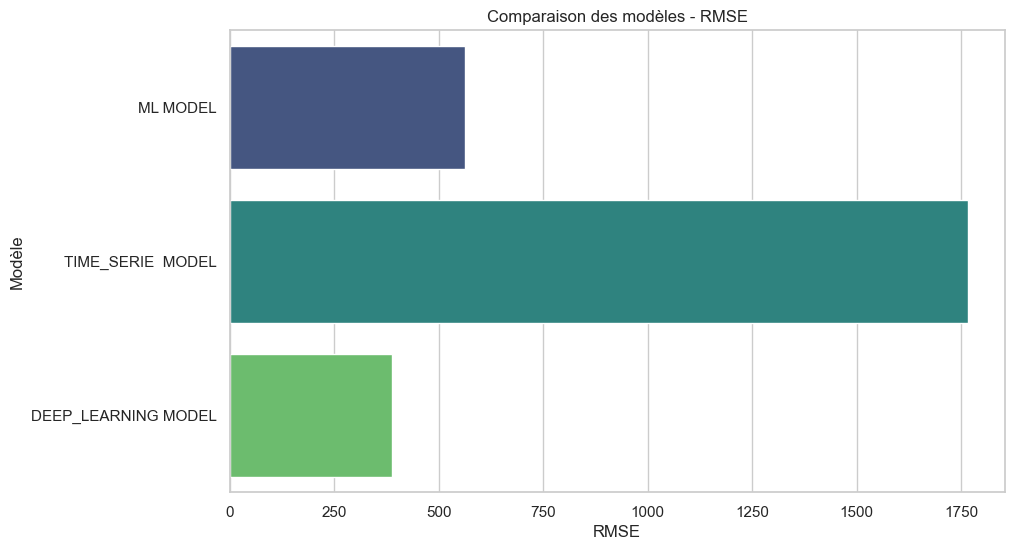

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

models = ['ML MODEL','TIME_SERIE  MODEL', 'DEEP_LEARNING MODEL']
rmse_values = [ 564.19, 1766.012, 388.81] 

# Créer le DataFrame pour la visualisation
df_rmse = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_values
})

# Tracer le graphique
plt.figure(figsize=(10,6))
sns.barplot(x='RMSE', y='Model', data=df_rmse, palette='viridis', orient='h')
plt.title('Comparaison des modèles - RMSE')
plt.xlabel('RMSE')
plt.ylabel('Modèle')
plt.show()


**Le Deep Learning Model présente la plus faible erreur (RMSE : 388.81), confirmant sa meilleure performance pour la prédiction du trafic**